# ST2195 Coursework Project

# PART-1

In this part, We are asked to work with the Markov Chain Monte Carlo algorithm, in particular the Metropolis-Hastings algorithm. The aim is to simulate random numbers for the distribution with probability density function given below  <br>
f(x) = 0.5 * exp(−|x|), <br>
where x takes values in the real line and |x| denotes the absolute value of x. More specifically, you are asked to generate x0, x1, . . . , xN values and store them using the following version of the Metropolis-Hastings algorithm (also known as random walk Metropolis) that consists of the steps below:


### Setting up Random Walk Metropolis

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [21]:
# Probability density function f(x)
# Target distribution f(x) = 1/2 * exp(-|x|)
def f(x):
    return 0.5 * np.exp(-np.abs(x))  

# Setting up initial values
x0 = 0  # Initial value of x
N = 10000  # Number of iterations
s = 1.0  # Standard deviation (step size) for the proposal distribution

# Array to store the generated values
x_values = np.zeros(N + 1)
x_values[0] = x0  

# Random walk Metropolis-Hastings
for i in range(1, N + 1):
    
    x_star = np.random.normal(x_values[i - 1], s)
    r = f(x_star) / f(x_values[i - 1])
    
    # u from Uniform(0, 1)
    u = np.random.uniform(0, 1)
    
    # Acceptance or Rejection criteria based on the ratio
    if u < r:
        x_values[i] = x_star  # Accept the new value
    else:
        x_values[i] = x_values[i - 1]  # Reject the new value, stay at the current value


In [22]:
x_values

array([ 0.        ,  0.        ,  0.        , ..., -0.42773908,
        0.63795099,  0.09271622])

## Answer for Question 1.a
<br>
Apply the random walk Metropolis algorithm using N = 10000 and s = 1. Use the generated samples (x1, . . . xN ) to construct a histogram and a kernel density plot in the same figure. Note that these provide estimates of f (x).Overlay a graph of f (x) on this figure to visualise the quality of these estimates. Also, report the sample mean and standard deviation of the generated samples (Note: these are also known as the Monte Carlo estimates of the mean and standard deviation respectively).
Practical tip: To avoid numerical errors, it is better to use the equivalent criterion log u < log r (x∗, xi−1) = log f (x∗) − log f (xi−1) instead of u < r (x∗, xi−1).

Sample Mean: 0.08574195362828
Sample Standard Deviation: 1.4198849829029325


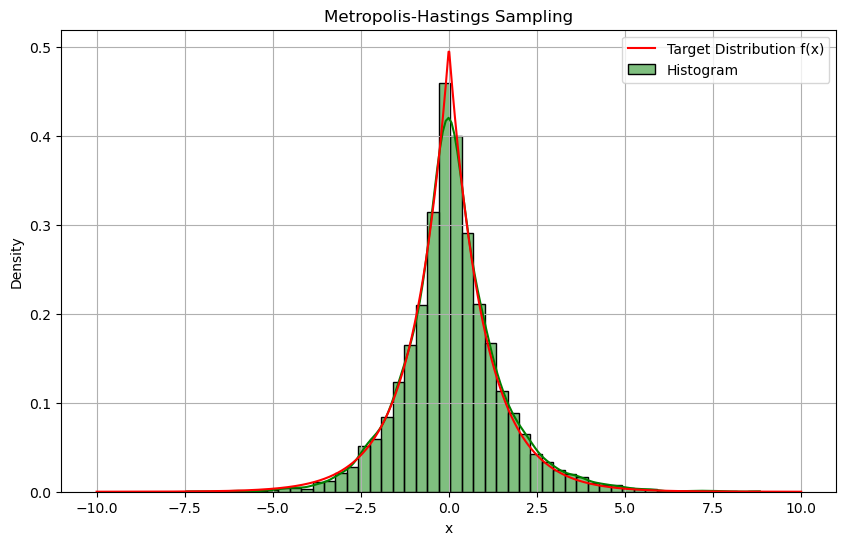

In [23]:
# Random walk Metropolis-Hastings
for i in range(1, N + 1):
    
    x_star = np.random.normal(x_values[i - 1], s)
    
    # Ratio using log r(x*, x[i-1])
    log_r = np.log(f(x_star)) - np.log(f(x_values[i - 1]))   
    
    # u from Uniform(0, 1)
    u = np.random.uniform(0, 1)
    
    # # Acceptance or Rejection criteria based on the new ratio
    if np.log(u) < log_r:
        x_values[i] = x_star  # Accept the new value
    else:
        x_values[i] = x_values[i - 1]  # Reject the new value

# Sample mean and standard deviation
sample_mean = np.mean(x_values)
sample_std = np.std(x_values)


print(f"Sample Mean: {sample_mean}")
print(f"Sample Standard Deviation: {sample_std}")

# Plotting
plt.figure(figsize=(10, 6))

# Histogram and kernel density estimate
sns.histplot(x_values[1:], bins=50, stat="density", color='g', label='Histogram', kde=True)

# Overlay the target distribution
x = np.linspace(-10, 10, 1000)
plt.plot(x, f(x), 'r-', label='Target Distribution f(x)')


plt.xlabel('x')
plt.ylabel('Density')
plt.title('Metropolis-Hastings Sampling')
plt.legend()
plt.grid()
plt.show()

---
---
---
---
---

## Answer for Question 1.b
<br>
The operations in part 1(a) are based on the assumption that the algorithm has converged. One of the most widely used convergence diagnostics is the so-called Rb value. In order to obtain a valued of this diagnostic, you need to apply the procedure below:
• Generate more than one sequence of x0,...,xN, potentially using different
initial values x0. Denote each of these sequences, also known as chains, by
(x(j),x(j),...,x(j)) for j = 1,2,...,J. 01N
• Define and compute Mj as the sample mean of chain j as 1N
i=1
and Vj as the within sample variance of chain j as
Mj = Xx(j). Ni
1N
Vj = X(x(j) −Mj)2.
Ni i=1
• Define and compute the overall within sample variance W as 1 XJ
W=J Vj j=1
• Define and compute the overall sample mean M as 1 XJ
M=J Mj, j=1
and the between sample variance B as 1 XJ
• Compute the Rb value as
In general, values of Rb close to 1 indicate convergence, and it is usually desired for Rb to be lower than 1.05. Calculate the Rb for the random walk Metropolis algorithm with N = 2000, s = 0.001 and J = 4. Keeping N and J fixed, provide a plot of the values of Rb over a grid of s values in the interval between 0.001 and 1.

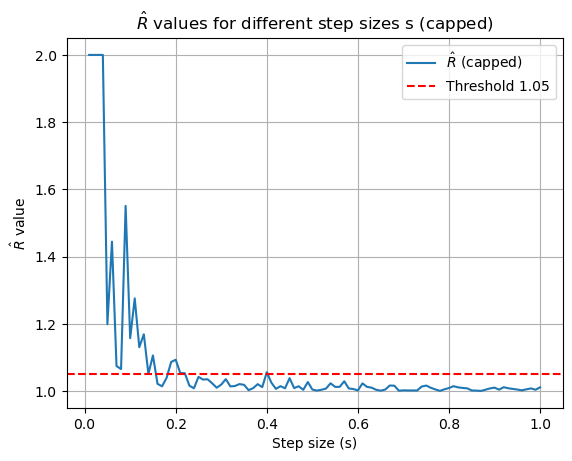

In [25]:

# Target distribution function f(x)
def f(x):
    return 0.5 * np.exp(-np.abs(x))

# Metropolis-Hastings algorithm for a single chain
def metropolis_hastings_chain(x0, N, s, burn_in=500):
    x_values = np.zeros(N + burn_in)  
    x_values[0] = x0
    for i in range(1, N + burn_in):
        x_star = np.random.normal(x_values[i-1], s)
        log_r = np.log(f(x_star)) - np.log(f(x_values[i-1]))
        u = np.random.uniform(0, 1)
        if np.log(u) < log_r:
            x_values[i] = x_star
        else:
            x_values[i] = x_values[i-1]
    
    # Chain after the burn-in period
    return x_values[burn_in:]

# R_hat value
def compute_r_hat(chains):
    J = len(chains)  
    N = len(chains[0])  
    
    #  Mj(mean of each chain) and Vj(variance of each chain)
    Mj = np.mean(chains, axis=1)
    Vj = np.var(chains, axis=1, ddof=1)
    
    # Overall mean M
    M = np.mean(Mj)
    
    # Within-sample variance W
    W = np.mean(Vj)
    
    # Between-sample variance B
    B = np.mean((Mj - M)**2)
    
    # R_hat
    R_hat = np.sqrt((B + W) / W)
    return R_hat

# Multiple chains and R_hat over a grid of s values
N = 2000  
J = 4  
burn_in = 500  
initial_values = [0, 1, -1, 2]  
s_values = np.linspace(0.01, 1, 100)  
r_hat_values = []

# Cap for R_hat values
r_hat_cap = 2  

for s in s_values:
    chains = []
    for x0 in initial_values:
        chain = metropolis_hastings_chain(x0, N, s, burn_in=burn_in)
        chains.append(chain)
    chains = np.array(chains)
    r_hat = compute_r_hat(chains)
    
    # Capped R_hat value for visualization
    if r_hat > r_hat_cap:
        r_hat = r_hat_cap  # Cap the R_hat value
    r_hat_values.append(r_hat)

# Plotting
plt.plot(s_values, r_hat_values, label=r'$\hat{R}$ (capped)')
plt.axhline(y=1.05, color='r', linestyle='--', label='Threshold 1.05')
plt.xlabel('Step size (s)')
plt.ylabel(r'$\hat{R}$ value')
plt.title(r'$\hat{R}$ values for different step sizes s (capped)')
plt.legend()
plt.grid(True)
plt.show()


---
---
---
---
---

# PART-2

#### The 2009 ASA Statistical Computing and Graphics Data Expo consisted of flight arrival and departure details for all commercial flights on major carriers within the USA from Oc- tober 1987 to April 2008. This is a large dataset; there are nearly 120 million records in total, and it takes up 1.6 gigabytes of space when compressed and 12 gigabytes when un- compressed. The complete dataset, along with supplementary information and variable descriptions, can be downloaded from the Harvard Dataverse at https://doi.org/10.7910/DVN/HG7NV7
Choose any subset of ten consecutive years and any of the supplementary information provided by the Harvard Dataverse to answer the following questions using the principles and tools you have learned in this course:


## I am choosing 10 years period of 1996-2005 

In [19]:
# Uploading Downloaded flights data to SQL

import os
import sqlite3
import pandas as pd


csv_folder_path = "/Users/muhammadshamoontariq/Desktop/LSE_Prog practice assignments/dataverse_files/Analysis_data_csv"  # Your folder path with CSV files
db_file_path = "flights_data.db"  # Path to your SQLite database file

# Connecting to SQL
conn = sqlite3.connect(db_file_path)

# Looping through 14 files
for file in os.listdir(csv_folder_path):
    if file.endswith(".csv"):  
        file_path = os.path.join(csv_folder_path, file)
        table_name = os.path.splitext(file)[0]

        print(f"Processing file: {file}")  

        try:
            # Encountered encoding error so add exception
            df = pd.read_csv(file_path, encoding='utf-8', on_bad_lines='skip')
        except UnicodeDecodeError:
            df = pd.read_csv(file_path, encoding='ISO-8859-1', on_bad_lines='skip')

        # Uploading the DataFrame to SQLite
        df.to_sql(table_name, conn, if_exists='replace', index=False)
        print(f"Uploaded {file} to the '{table_name}' table.")


conn.close()
print("All CSV files have been uploaded.")

Processing file: 1996.csv
Uploaded 1996.csv to the '1996' table.
Processing file: 1997.csv
Uploaded 1997.csv to the '1997' table.
Processing file: plane-data.csv
Uploaded plane-data.csv to the 'plane-data' table.
Processing file: 2001.csv
Uploaded 2001.csv to the '2001' table.
Processing file: 2000.csv
Uploaded 2000.csv to the '2000' table.
Processing file: 2002.csv
Uploaded 2002.csv to the '2002' table.
Processing file: 2003.csv


/var/folders/4x/91ch2jzn4253nhf4brp_8yxm0000gn/T/ipykernel_2329/896464981.py:22: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='utf-8', on_bad_lines='skip')


Uploaded 2003.csv to the '2003' table.
Processing file: 2004.csv
Uploaded 2004.csv to the '2004' table.
Processing file: 2005.csv
Uploaded 2005.csv to the '2005' table.
Processing file: airports.csv
Uploaded airports.csv to the 'airports' table.
Processing file: 1999.csv
Uploaded 1999.csv to the '1999' table.
Processing file: variable-descriptions.csv
Uploaded variable-descriptions.csv to the 'variable-descriptions' table.
Processing file: 1998.csv
Uploaded 1998.csv to the '1998' table.
Processing file: carriers.csv
Uploaded carriers.csv to the 'carriers' table.
All CSV files have been uploaded.


## Answer to Question 2 a)

### What are the best times and days of the week to minimise delays each year?


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

In [27]:
#Connecting to the SQLite database
conn = sqlite3.connect('flights_data.db')  # Update with your actual database name


#### First anlyzing only one year (2005)

In [28]:
#inspecting data
year = '2005'
query = f'SELECT * FROM "{year}";'
flights_2005 = pd.read_sql_query(query, conn)
flights_2005.head(50)

Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0   2005      1          28          5   1603.0        1605   1741.0   
1   2005      1          29          6   1559.0        1605   1736.0   
2   2005      1          30          7   1603.0        1610   1741.0   
3   2005      1          31          1   1556.0        1605   1726.0   
4   2005      1           2          7   1934.0        1900   2235.0   
5   2005      1           3          1   2042.0        1900      9.0   
6   2005      1           4          2   2046.0        1900   2357.0   
7   2005      1           5          3      NaN        1900      NaN   
8   2005      1           6          4   2110.0        1900      8.0   
9   2005      1           7          5   1859.0        1900   2235.0   
10  2005      1           9          7   1859.0        1900   2205.0   
11  2005      1          10          1   1917.0        1900   2240.0   
12  2005      1          11          2   1935.0        1900   2259.0   
13  2005      1          12          3   2038.0        1900     18.0   
14  2005      1          13          4   2106.0        1900      9.0   
15  2005      1          14          5   1919.0        1900   2228.0   
16  2005      1          16          7   1911.0        1900      NaN   
17  2005      1          17          1   1859.0        1900   2202.0   
18  2005      1          18          2   1856.0        1900   2227.0   
19  2005      1          19          3   1939.0        1900   2348.0   
20  2005      1          20          4   2128.0        1900     41.0   
21  2005      1          21          5   1913.0        1900   2226.0   
22  2005      1          23          7      NaN        1900      NaN   
23  2005      1          24          1      NaN        1900      NaN   
24  2005      1          25          2   1849.0        1900   2200.0   
25  2005      1          26          3      NaN        1900      NaN   
26  2005      1          27          4   1859.0        1900   2215.0   
27  2005      1          28          5   1855.0        1900   2218.0   
28  2005      1          30          7   1858.0        1900   2212.0   
29  2005      1          31          1   1858.0        1900   2215.0   
30  2005      1           1          6   1704.0        1715   1919.0   
31  2005      1           2          7   1713.0        1715   1911.0   
32  2005      1           3          1   1856.0        1715   2106.0   
33  2005      1           4          2   1744.0        1715   1950.0   
34  2005      1           5          3      NaN        1715      NaN   
35  2005      1           6          4   2046.0        1705   2221.0   
36  2005      1           7          5   1704.0        1705   1926.0   
37  2005      1           9          7   1853.0        1705   2138.0   
38  2005      1          10          1   1703.0        1705   1906.0   
39  2005      1          11          2   1748.0        1705   1945.0   
40  2005      1          12          3      NaN        1705      NaN   
41  2005      1          13          4   1856.0        1705   2048.0   
42  2005      1          14          5   1712.0        1705   1919.0   
43  2005      1          16          7   1655.0        1705   1916.0   
44  2005      1          17          1   1704.0        1705   1857.0   
45  2005      1          18          2   1657.0        1705   1846.0   
46  2005      1          19          3   1809.0        1705   2028.0   
47  2005      1          20          4   1923.0        1705   2112.0   
48  2005      1          21          5   1716.0        1705   1916.0   
49  2005      1          23          7      NaN        1705      NaN   

    CRSArrTime UniqueCarrier  FlightNum  ... TaxiIn  TaxiOut  Cancelled  \
0         1759            UA        541  ...      4       23          0   
1         1759            UA        541  ...      6       15          0   
2         1805            UA        541  ...      9       18          0   
3         1759            UA   

In [29]:
# Fetching data only for Departure time, Day of the week & Departure Delays
query_1 = f'SELECT DepTime, DayOfWeek, DepDelay FROM "{year}";'
df = pd.read_sql_query(query_1, conn)

In [30]:
#Preprocessing
# Converting object data type to Numeric AND removing NA values
df['DepTime'] = pd.to_numeric(df['DepTime'], errors='coerce')
df['DepDelay'] = pd.to_numeric(df['DepDelay'], errors='coerce')
df.dropna(inplace=True)  # Remove NA values

In [31]:
# Converting DepTime into time categories (e.g., morning, afternoon, evening)
# Adding a new column 'TimeCategory' based on DepTime ranges
def categorize_time(time):
    if pd.isnull(time):
        return 'Unknown'
    time = int(time)
    if 0 <= time < 600:
        return 'Late Night'
    elif 600 <= time < 1200:
        return 'Morning'
    elif 1200 <= time < 1800:
        return 'Afternoon'
    else:
        return 'Evening'

df['TimeCategory'] = df['DepTime'].apply(categorize_time)


In [32]:
# Group by DayOfWeek and TimeCategory, and calculate the average departure delay
delay_summary = df.groupby(['DayOfWeek', 'TimeCategory'])['DepDelay'].mean().reset_index()


# Pivot table to create a heatmap-friendly format
pivot_df = delay_summary.pivot(index='DayOfWeek', columns='TimeCategory', values='DepDelay')

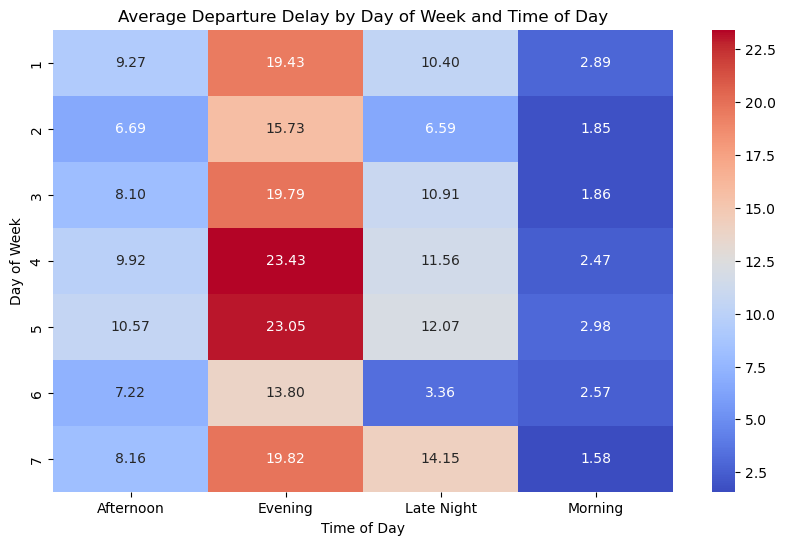

In [34]:
# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Average Departure Delay by Day of Week and Time of Day')
plt.ylabel('Day of Week')
plt.xlabel('Time of Day')
plt.show()

# 10-year period (1996 to 2005) Analysis

### Best times and days of the week to minimise delays each year?

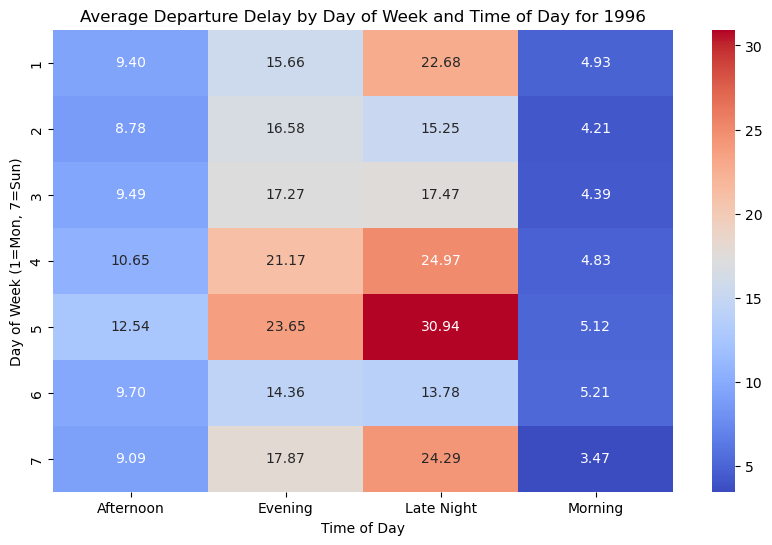

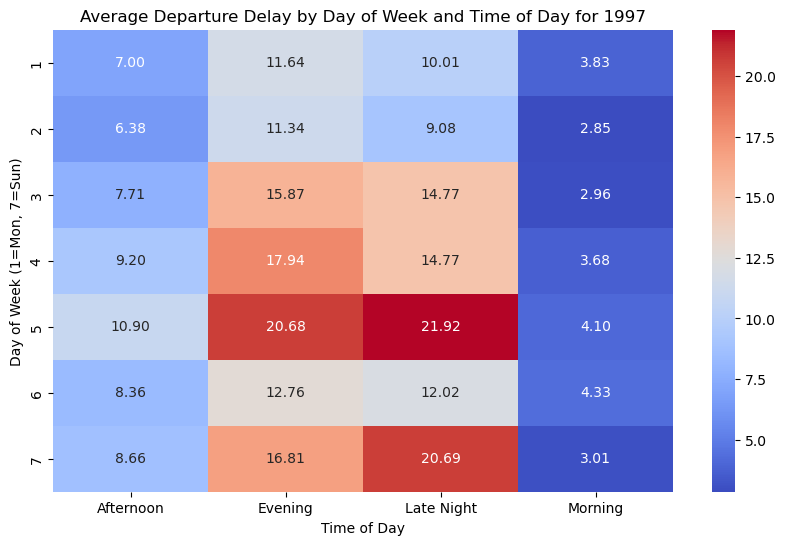

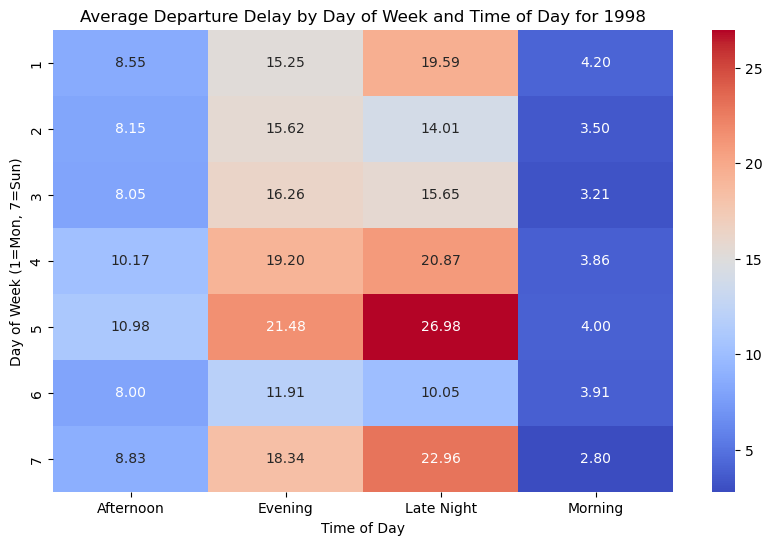

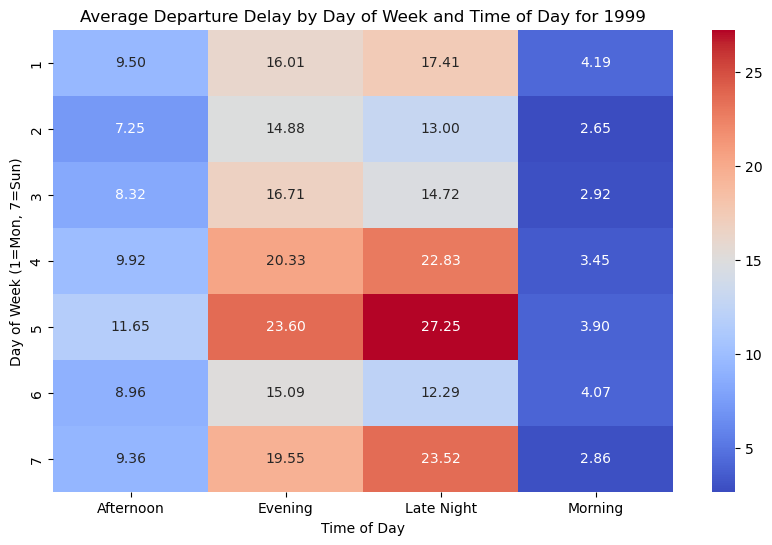

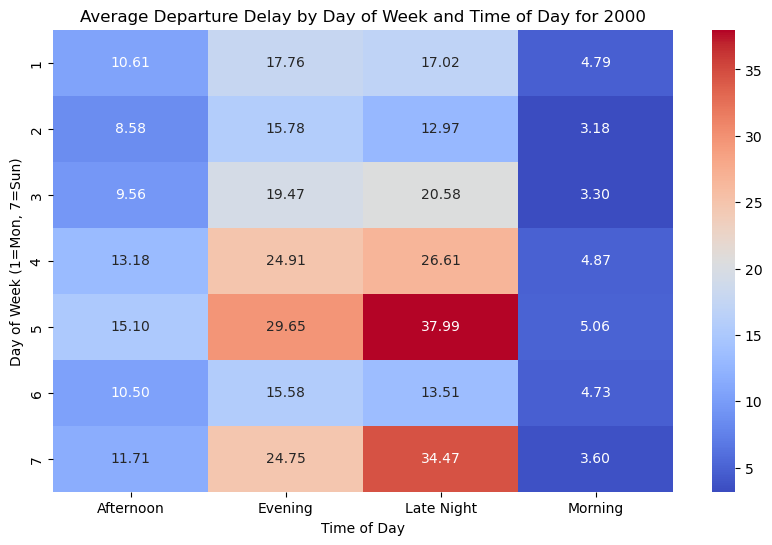

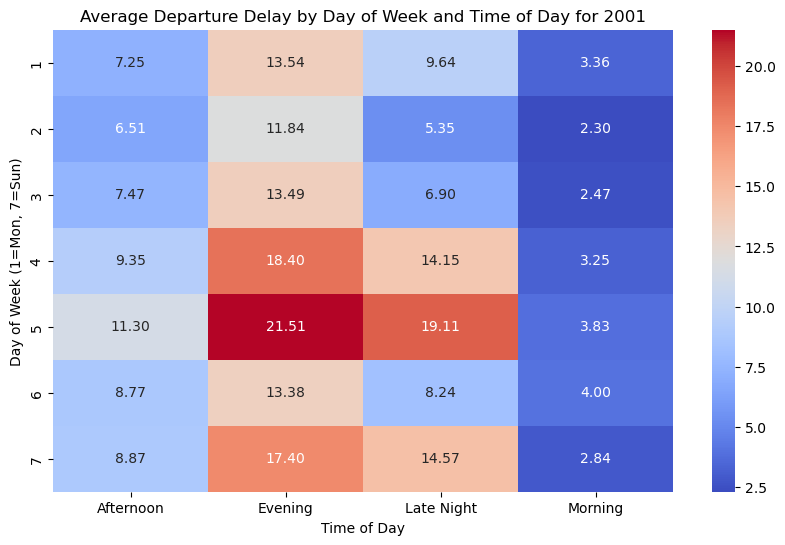

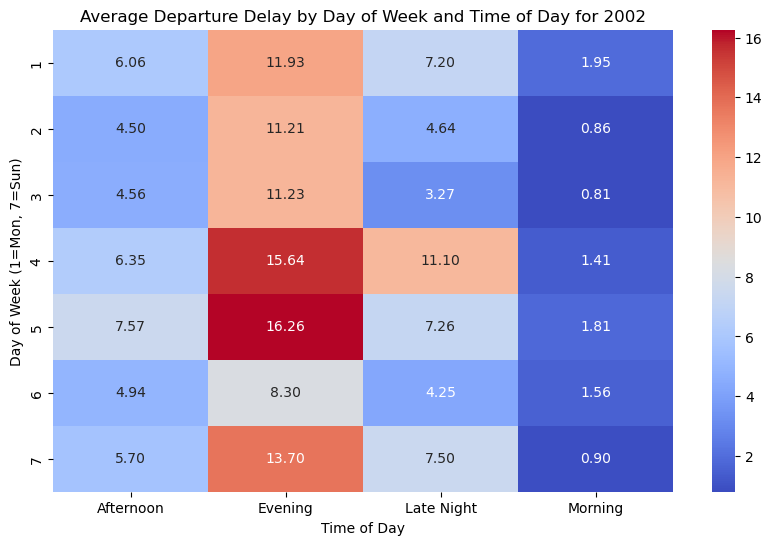

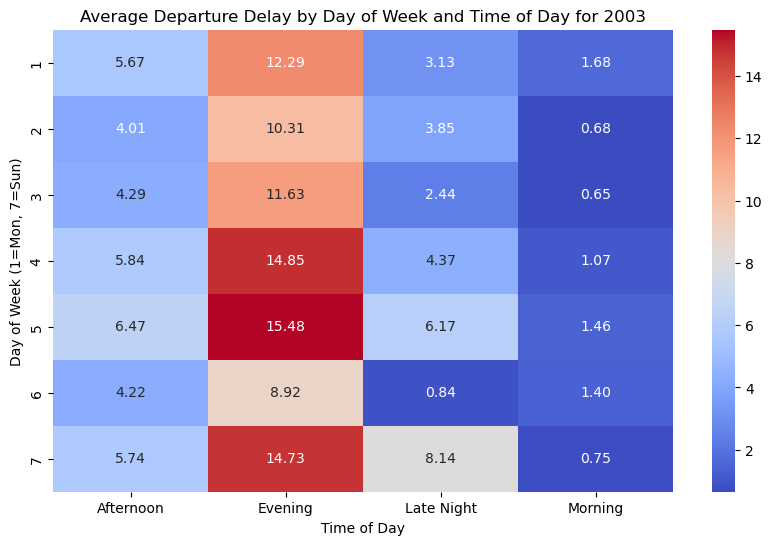

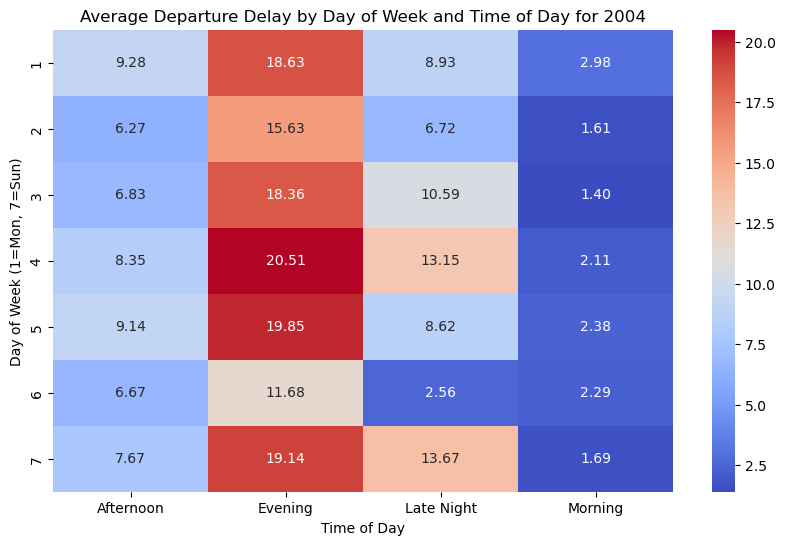

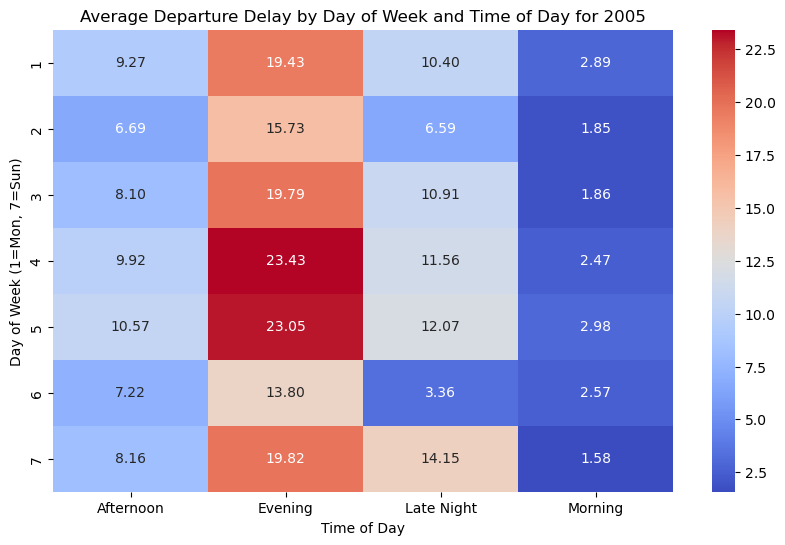

In [35]:
#Setting up range of the years
years = [str(year) for year in range(1996, 2006)]  

# dictionary to store results for each year
delay_summaries = {}

for year in years:
    
    query = f'SELECT DepTime, DayOfWeek, DepDelay FROM "{year}";'
    df = pd.read_sql_query(query, conn)

   
    df['DepTime'] = pd.to_numeric(df['DepTime'], errors='coerce')
    df['DepDelay'] = pd.to_numeric(df['DepDelay'], errors='coerce')
    df.dropna(inplace=True)  # Remove NA values


    # Converting DepTime into time categories (e.g., morning, afternoon, evening)
    def categorize_time(time):
        if pd.isnull(time):
            return 'Unknown'
        time = int(time)
        if 0 <= time < 600:
            return 'Late Night'
        elif 600 <= time < 1200:
            return 'Morning'
        elif 1200 <= time < 1800:
            return 'Afternoon'
        else:
            return 'Evening'

    df['TimeCategory'] = df['DepTime'].apply(categorize_time)

    # Group by DayOfWeek and TimeCategory, and calculate the average departure delay
    delay_summary = df.groupby(['DayOfWeek', 'TimeCategory'])['DepDelay'].mean().reset_index()

    # Adding the 'Year' column to the delay summary df
    delay_summary['Year'] = year

    delay_summaries[year] = delay_summary

    # Pivot table to create a heatmap-friendly format
    pivot_df = delay_summary.pivot(index='DayOfWeek', columns='TimeCategory', values='DepDelay')

    # Heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot_df, cmap='coolwarm', annot=True, fmt='.2f')
    plt.title(f'Average Departure Delay by Day of Week and Time of Day for {year}')
    plt.ylabel('Day of Week (1=Mon, 7=Sun)')
    plt.xlabel('Time of Day')
    plt.show()

# Combining all the delay summaries into a single DataFrame for further analysis
combined_delay_summary = pd.concat(delay_summaries.values(), ignore_index=True)


In [36]:
combined_delay_summary

DayOfWeek TimeCategory   DepDelay  Year
0            1    Afternoon   9.402796  1996
1            1      Evening  15.660151  1996
2            1   Late Night  22.682505  1996
3            1      Morning   4.928273  1996
4            2    Afternoon   8.779582  1996
..         ...          ...        ...   ...
275          6      Morning   2.569259  2005
276          7    Afternoon   8.159330  2005
277          7      Evening  19.824906  2005
278          7   Late Night  14.152906  2005
279          7      Morning   1.578834  2005

[280 rows x 4 columns]

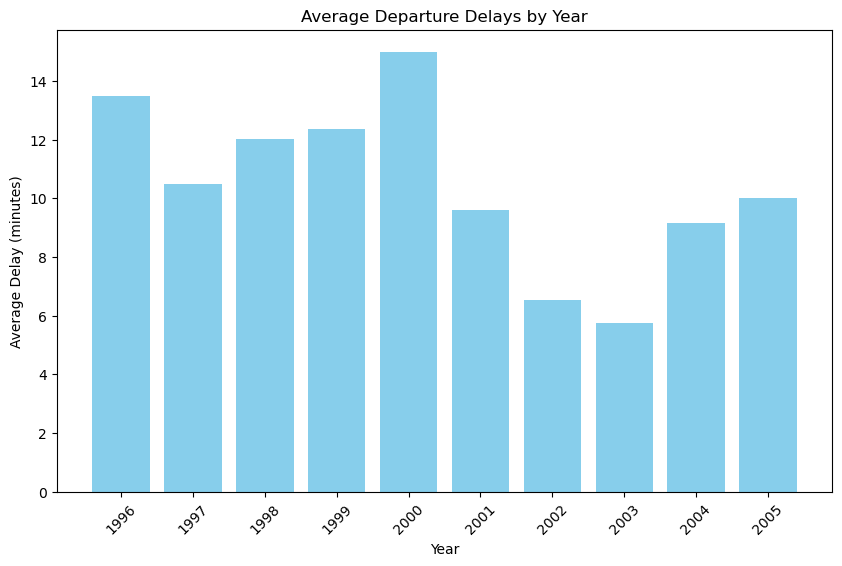

In [37]:
# average delays for each year
avg_delays_per_year = {year: delay_summary['DepDelay'].mean() for year, delay_summary in delay_summaries.items()}

plt.figure(figsize=(10, 6))
plt.bar(avg_delays_per_year.keys(), avg_delays_per_year.values(), color='skyblue')
plt.title('Average Departure Delays by Year')
plt.xlabel('Year')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)
plt.show()

avg_delays_per_year_df = pd.DataFrame(list(avg_delays_per_year.items()), columns=['Year', 'Average_DepDelay'])

In [38]:
avg_delays_per_year_df

Year  Average_DepDelay
0  1996         13.490613
1  1997         10.474485
2  1998         12.012788
3  1999         12.364171
4  2000         14.994136
5  2001          9.609518
6  2002          6.517076
7  2003          5.753411
8  2004          9.168447
9  2005         10.007463

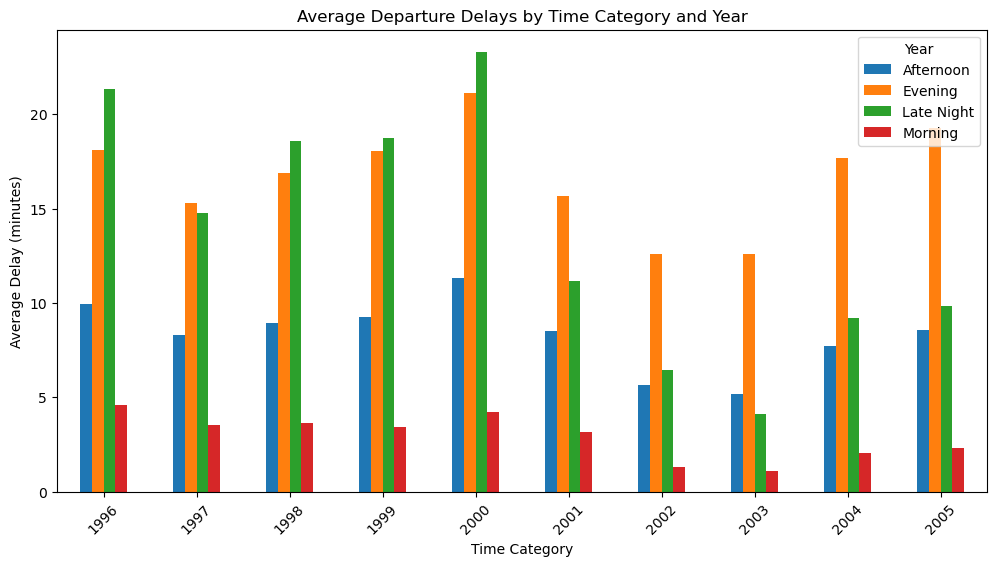

In [39]:
# Grouped bar chart
grouped_delay_summary = {}
for year, summary in delay_summaries.items():
    for time_cat in summary['TimeCategory'].unique():
        avg_delay = summary[summary['TimeCategory'] == time_cat]['DepDelay'].mean()
        grouped_delay_summary.setdefault(time_cat, {})[year] = avg_delay

# plotting
grouped_delay_df = pd.DataFrame(grouped_delay_summary).fillna(0)

grouped_delay_df.plot(kind='bar', figsize=(12, 6))
plt.title('Average Departure Delays by Time Category and Year')
plt.xlabel('Time Category')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.show()

In [40]:
grouped_delay_df

Afternoon    Evening  Late Night   Morning
1996   9.949529  18.080203   21.338396  4.594325
1997   8.316603  15.290904   14.752400  3.538032
1998   8.961148  16.866229   18.585073  3.638700
1999   9.280596  18.025347   18.715968  3.434772
2000  11.320548  21.128903   23.307836  4.219258
2001   8.501378  15.650287   11.136806  3.149599
2002   5.669246  12.610949    6.459375  1.328736
2003   5.176307  12.602037    4.135230  1.100069
2004   7.743560  17.685727    9.178115  2.066387
2005   8.561247  19.291515    9.862520  2.314569

In [41]:
# Minimum delays by DayOfWeek and TimeCategory for each year
optimal_times = {}

for year, summary in delay_summaries.items():
    min_delay = summary.loc[summary['DepDelay'].idxmin()]
    optimal_times[year] = {
        'Best Day': min_delay['DayOfWeek'],
        'Best Time Category': min_delay['TimeCategory'],
        'Min Delay': min_delay['DepDelay']
    }

optimal_times_df = pd.DataFrame(optimal_times).T
print("Optimal Times and Days for Each Year:")
optimal_times_df

Optimal Times and Days for Each Year:


Best Day Best Time Category Min Delay
1996        7            Morning  3.466494
1997        2            Morning  2.846978
1998        7            Morning  2.796162
1999        2            Morning  2.648988
2000        2            Morning  3.183434
2001        2            Morning  2.298717
2002        3            Morning  0.806952
2003        3            Morning  0.651963
2004        3            Morning  1.395166
2005        7            Morning  1.578834

In [42]:
# Maximum delay by DayOfWeek and TimeCategory for each year
max_delay_times = {}

for year, summary in delay_summaries.items():
    max_delay = summary.loc[summary['DepDelay'].idxmax()]  # Find the row with the max average delay
    max_delay_times[year] = {
        'Worst Day': max_delay['DayOfWeek'],
        'Worst Time Category': max_delay['TimeCategory'],
        'Max Delay': max_delay['DepDelay']
    }

max_delay_df = pd.DataFrame(max_delay_times).T
print("Maximum Delays for Each Year:")
max_delay_df

Maximum Delays for Each Year:


Worst Day Worst Time Category  Max Delay
1996         5          Late Night  30.935535
1997         5          Late Night  21.918415
1998         5          Late Night   26.98337
1999         5          Late Night  27.247613
2000         5          Late Night  37.992048
2001         5             Evening  21.509955
2002         5             Evening  16.262876
2003         5             Evening  15.483111
2004         4             Evening  20.505521
2005         4             Evening  23.428425

---
---
---
---
---

# Answer to Question 2 b)

### Evaluate whether older planes suffer more delays on a year-to-year basis?

#### First Analyzing only one year (2005)

In [43]:
year_of_analysis = 2005  

# Getting Arrival delays and Tail-number from flights data table and joining on Tail-Number with Planes table to get Year of Manufacture  
query = '''
SELECT f.ArrDelay, f.TailNum, p.Year as ManufactureYear
FROM "2005" f  
LEFT JOIN "plane-data" p ON f.TailNum = p.TailNum
WHERE f.Year = ?;  
'''

# Execute the query with the year_of_analysis parameter
df_age = pd.read_sql_query(query, conn, params=(year_of_analysis,))
df_age.head(50)

ArrDelay TailNum  ManufactureYear
0      -18.0  N935UA           1992.0
1      -23.0  N941UA           1992.0
2      -24.0  N342UA           1988.0
3      -33.0  N326UA           1988.0
4        3.0  N902UA           1990.0
5       97.0  N904UA           1990.0
6       85.0  N942UA           1992.0
7        NaN  000000              NaN
8      105.0  N920UA              NaN
9       12.0  N340UA           1988.0
10     -18.0  N929UA           1992.0
11      17.0  N934UA           1992.0
12      36.0  N336UA           1988.0
13     115.0  N920UA              NaN
14     106.0  N923UA           1992.0
15       5.0  N917UA              NaN
16       NaN  N348UA           1988.0
17     -21.0  N902UA           1990.0
18       4.0  N906UA           1991.0
19      85.0  N932UA           1992.0
20     138.0  N910UA           1991.0
21       3.0  N934UA           1992.0
22       NaN  000000              NaN
23       NaN  000000              NaN
24     -23.0  N929UA           1992.0
25       NaN  000000              NaN
26      -8.0  N927UA           1992.0
27      -5.0  N923UA           1992.0
28     -11.0  N920UA              NaN
29      -8.0  N919UA           1991.0
30       4.0  N203UA           1990.0
31      -4.0  N392UA              NaN
32     111.0  N916UA              NaN
33      35.0  N927UA           1992.0
34       NaN  000000              NaN
35     199.0  N342UA           1988.0
36      24.0  N312UA           1987.0
37     156.0  N326UA           1988.0
38       4.0  N912UA           1991.0
39      43.0  N348UA           1988.0
40       NaN  000000              NaN
41     106.0  N203UA           1990.0
42      17.0  N326UA           1988.0
43      14.0  N363UA              NaN
44      -5.0  N333UA           1988.0
45     -16.0  N349UA           1988.0
46      86.0  N343UA              NaN
47     130.0  N347UA           1988.0
48      14.0  N398UA           1990.0
49       NaN  000000              NaN

In [44]:

#Data Preprocessing
#Converting Object type to Numeric
df_age['ArrDelay'] = pd.to_numeric(df_age['ArrDelay'], errors='coerce')  
df_age['ManufactureYear'] = pd.to_numeric(df_age['ManufactureYear'], errors='coerce')  

# Removing NA rows (Also include 0 values as some fields are missing data)
df_age.dropna(subset=['ArrDelay', 'ManufactureYear'], inplace=True)  

#Counting invalid values (Removing planes which were provided same year or after the year under anlysis)

same_year_count = (df_age['ManufactureYear'] == year_of_analysis).sum()
beyond_year_count = (df_age['ManufactureYear'] > year_of_analysis).sum()

# Total count of invalid values (not strictly necessary for removal)
total_invalid_count = same_year_count + beyond_year_count


# indices of rows to drop
indices_to_drop = df_age[
    (df_age['ManufactureYear'] == year_of_analysis) |  # Same year
    (df_age['ManufactureYear'] > year_of_analysis) |   # Beyond year of analysis
    (df_age['ManufactureYear'] == 0)                    # Zero values (Some data is missing in the provided database)
].index

df_age.drop(indices_to_drop, inplace=True)


In [45]:
# Counting how many values in 'year' are null
null_count = df_age['ManufactureYear'].isnull().sum()

# Counting how many values in 'year' are empty strings
empty_count = (df_age['ManufactureYear'] == "").sum()

# Counting how many values in 'year' are zeero
zero_count = (df_age['ManufactureYear'] == 0).sum()


# Counting how many values in 'year' are 2005
same_year_count = (df_age['ManufactureYear'] == 2005).sum()

# Counting how many values in 'year' are greater than 2005
beyond_year_count = (df_age['ManufactureYear'] > 2005).sum()


# Total count of null, empty, and zero values
total_invalid_count = null_count + empty_count + same_year_count + beyond_year_count + zero_count 

print(f"Number of null values in 'year': {null_count}")
print(f"Number of empty values in 'year': {empty_count}")
print(f"Number of zero values in 'year': {zero_count}")

print(f"Number of same year in 'year': {same_year_count}")
print(f"Number of beyond year in 'year': {beyond_year_count}")
print(f"Total number of null, empty, or zero values in 'year': {total_invalid_count}")

Number of null values in 'year': 0
Number of empty values in 'year': 0
Number of zero values in 'year': 0
Number of same year in 'year': 0
Number of beyond year in 'year': 0
Total number of null, empty, or zero values in 'year': 0


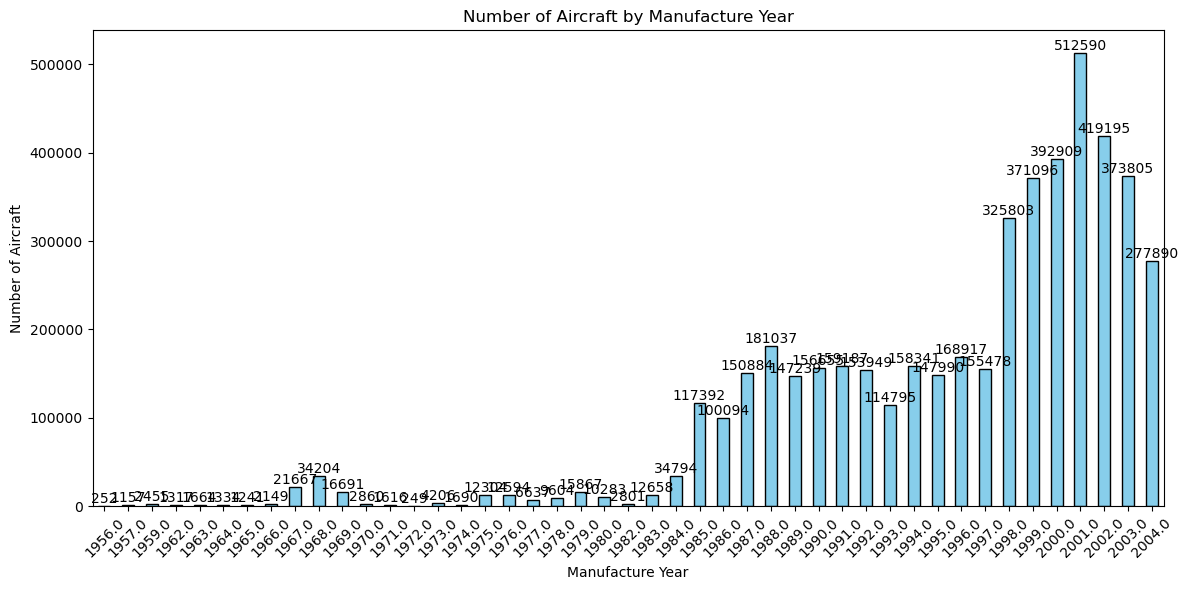

In [46]:
# Inspecting data if any invalid entries exists. Group by ManufactureYear and count occurrences
year_counts = df_age['ManufactureYear'].value_counts().sort_index()

# Plotting the bar chart
plt.figure(figsize=(12, 6))  # Set the figure size
year_counts.plot(kind='bar', color='skyblue', edgecolor='black')


plt.title('Number of Aircraft by Manufacture Year')
plt.xlabel('Manufacture Year')
plt.ylabel('Number of Aircraft')


for index, value in enumerate(year_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Show the plot
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

In [47]:
#Calculating Aircraft Age & Delays
# flight year is 2005 for all rows 
df_age['AircraftAge'] = 2005 - df_age['ManufactureYear']

# Step 4: Group by AircraftAge and calculate average arrival delay
avg_delay_by_age = df_age.groupby('AircraftAge')['ArrDelay'].mean().reset_index()

Delay= avg_delay_by_age.sort_values(by = 'AircraftAge')
Delay

AircraftAge   ArrDelay
0           1.0   7.446853
1           2.0   6.108492
2           3.0   7.838889
3           4.0   7.024224
4           5.0   7.846201
5           6.0   7.558214
6           7.0   7.167340
7           8.0   8.149584
8           9.0   6.198914
9          10.0   6.052720
10         11.0   7.706709
11         12.0   6.762977
12         13.0   9.121995
13         14.0   8.631861
14         15.0   8.272708
15         16.0   7.703007
16         17.0   7.796870
17         18.0   7.292244
18         19.0   7.971607
19         20.0   8.616652
20         21.0   7.665689
21         22.0   7.717728
22         23.0   7.033202
23         25.0   8.349703
24         26.0   9.399950
25         27.0  11.118180
26         28.0   9.450053
27         29.0  10.087264
28         30.0   9.297708
29         31.0   7.947929
30         32.0   8.182596
31         33.0   8.397590
32         34.0   5.131807
33         35.0   9.208741
34         36.0   8.313402
35         37.0   7.660595
36         38.0   6.557115
37         39.0   4.830154
38         40.0  11.195004
39         41.0   7.554723
40         42.0   5.602163
41         43.0   6.514806
42         46.0   6.467210
43         48.0   2.809853
44         49.0   7.341270

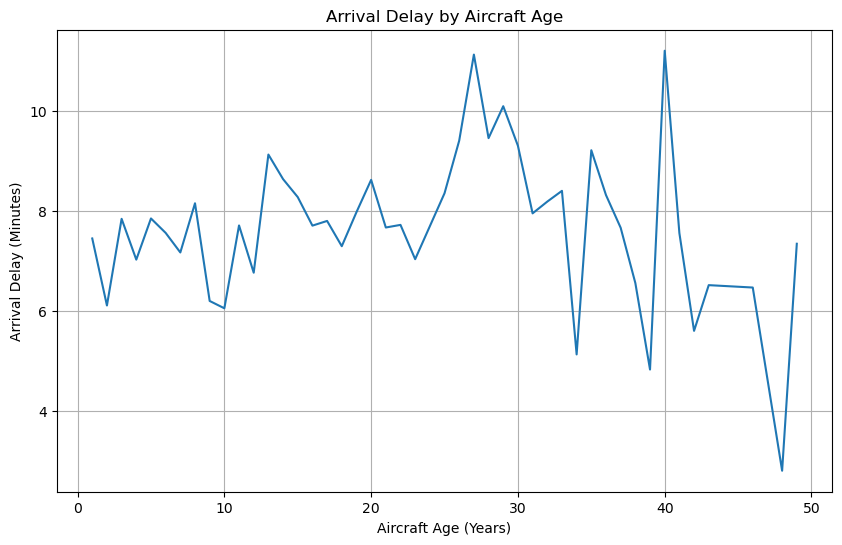

In [48]:
#Visualizing through line chart
plt.figure(figsize=(10, 6))
plt.plot(avg_delay_by_age['AircraftAge'], avg_delay_by_age['ArrDelay'], linestyle='-')


plt.title('Arrival Delay by Aircraft Age')
plt.xlabel('Aircraft Age (Years)')
plt.ylabel('Arrival Delay (Minutes)')

plt.grid(True)
plt.show()

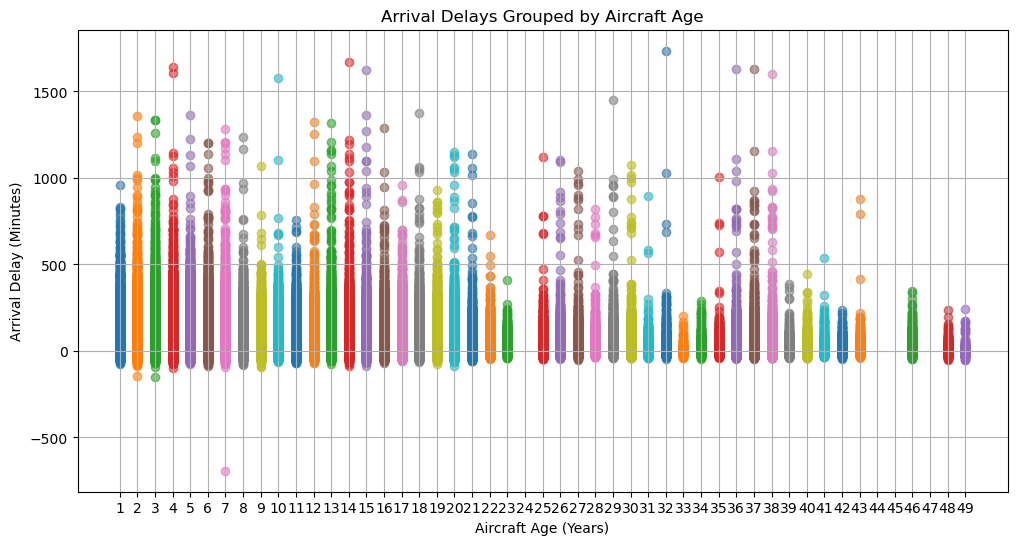

In [49]:
#Visualizing through scatter plot

# For example, let's collect all delays for each aircraft age
delays_by_age = df_age.groupby('AircraftAge')['ArrDelay'].apply(list).reset_index()


## Step 3: Plot the results
plt.figure(figsize=(12, 6))

# Scatter plot for each age
for index, row in delays_by_age.iterrows():
    plt.scatter([row['AircraftAge']] * len(row['ArrDelay']), row['ArrDelay'], alpha=0.6)

# Setting the title and labels
plt.title('Arrival Delays Grouped by Aircraft Age')
plt.xlabel('Aircraft Age (Years)')
plt.ylabel('Arrival Delay (Minutes)')

# Setting x-ticks to be integers
plt.xticks(range(int(df_age['AircraftAge'].min()), int(df_age['AircraftAge'].max() + 1)))  

plt.grid()
plt.show()

In [50]:
delays_by_age

AircraftAge                                           ArrDelay
0           1.0  [-28.0, 40.0, -22.0, 88.0, 160.0, -19.0, -18.0...
1           2.0  [-5.0, 12.0, 16.0, -2.0, -4.0, -3.0, -18.0, -1...
2           3.0  [42.0, 71.0, 40.0, 230.0, 66.0, -7.0, -10.0, 1...
3           4.0  [108.0, 67.0, 11.0, 82.0, 10.0, 86.0, -14.0, -...
4           5.0  [-2.0, 77.0, 1.0, -11.0, -15.0, 78.0, -26.0, 1...
5           6.0  [8.0, 27.0, 118.0, -23.0, -4.0, -11.0, -2.0, 2...
6           7.0  [-16.0, 38.0, 36.0, 37.0, -3.0, 94.0, 31.0, -1...
7           8.0  [87.0, 125.0, 33.0, 81.0, 2.0, -7.0, -15.0, 11...
8           9.0  [70.0, 82.0, 4.0, 0.0, 3.0, 2.0, -2.0, -6.0, 3...
9          10.0  [8.0, 142.0, 2.0, 30.0, -6.0, -10.0, 111.0, 11...
10         11.0  [101.0, 134.0, -28.0, 10.0, 6.0, 14.0, -11.0, ...
11         12.0  [-5.0, 2.0, 163.0, 29.0, 0.0, 5.0, 4.0, 21.0, ...
12         13.0  [-18.0, -23.0, 85.0, -18.0, 17.0, 106.0, 85.0,...
13         14.0  [4.0, 138.0, -8.0, 4.0, 33.0, 15.0, 105.0, 76....
14         15.0  [3.0, 97.0, -21.0, 4.0, 106.0, 14.0, -2.0, -8....
15         16.0  [-22.0, -16.0, 47.0, 283.0, 46.0, 69.0, 48.0, ...
16         17.0  [-24.0, -33.0, 12.0, 36.0, 199.0, 156.0, 43.0,...
17         18.0  [24.0, -19.0, 35.0, 50.0, 63.0, 85.0, 57.0, 4....
18         19.0  [39.0, -8.0, 6.0, 134.0, 27.0, -13.0, -9.0, -2...
19         20.0  [-5.0, 0.0, -6.0, 45.0, 4.0, 0.0, 30.0, -3.0, ...
20         21.0  [5.0, -5.0, -5.0, -5.0, -3.0, -4.0, -5.0, -10....
21         22.0  [1.0, -2.0, 1.0, 23.0, -1.0, -3.0, -3.0, 12.0,...
22         23.0  [7.0, 111.0, -13.0, 12.0, 13.0, 7.0, -10.0, 0....
23         25.0  [-6.0, -25.0, -48.0, -10.0, 13.0, 35.0, 18.0, ...
24         26.0  [84.0, 5.0, -1.0, -4.0, 7.0, -25.0, 24.0, -31....
25         27.0  [28.0, -15.0, -2.0, -6.0, -4.0, 27.0, 68.0, 25...
26         28.0  [18.0, -16.0, 1.0, 8.0, 22.0, 4.0, 39.0, 28.0,...
27         29.0  [6.0, -2.0, 2.0, 3.0, -11.0, 24.0, -29.0, 4.0,...
28         30.0  [20.0, 21.0, -10.0, -23.0, 17.0, -11.0, 3.0, 3...
29         31.0  [-38.0, 27.0, -13.0, -28.0, 81.0, -14.0, -34.0...
30         32.0  [-16.0, 27.0, 13.0, -3.0, 14.0, -2.0, 1.0, -6....
31         33.0  [15.0, -42.0, -8.0, 6.0, 24.0, -4.0, -19.0, -2...
32         34.0  [-5.0, -23.0, -28.0, -12.0, -14.0, 4.0, 19.0, ...
33         35.0  [-12.0, 3.0, 6.0, -4.0, 5.0, 102.0, 93.0, 21.0...
34         36.0  [20.0, -10.0, -4.0, -14.0, -26.0, 6.0, -16.0, ...
35         37.0  [87.0, -12.0, 53.0, 10.0, -21.0, -2.0, -8.0, 4...
36         38.0  [28.0, -18.0, -24.0, -26.0, 8.0, 3.0, -19.0, 5...
37         39.0  [-1.0, -5.0, -6.0, 2.0, -7.0, -6.0, -5.0, -15....
38         40.0  [1.0, 67.0, 69.0, 6.0, -6.0, -4.0, -8.0, -4.0,...
39         41.0  [15.0, 22.0, 8.0, -12.0, 38.0, 45.0, 40.0, -11...
40         42.0  [34.0, 19.0, -19.0, -8.0, -9.0, -6.0, 3.0, -26...
41         43.0  [71.0, -13.0, -10.0, 60.0, 26.0, -7.0, 64.0, -...
42         46.0  [16.0, 4.0, 14.0, -17.0, 7.0, 11.0, -5.0, 4.0,...
43         48.0  [-3.0, -1.0, 8.0, -15.0, 2.0, -7.0, -15.0, 20....
44         49.0  [20.0, -31.0, -37.0, 14.0, 63.0, 117.0, 27.0, ...

# 10-year period (1996 to 2005) Analysis

### Evaluate whether older planes suffer more delays on a year-to-year basis?

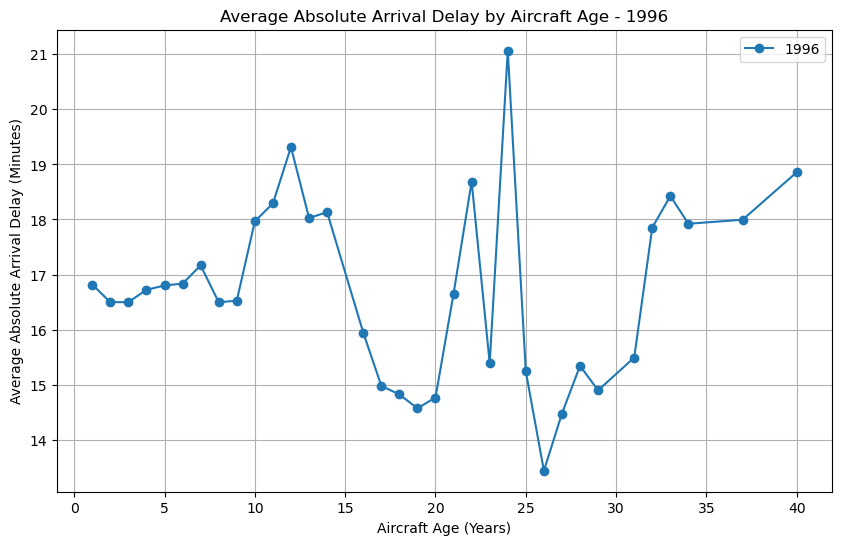

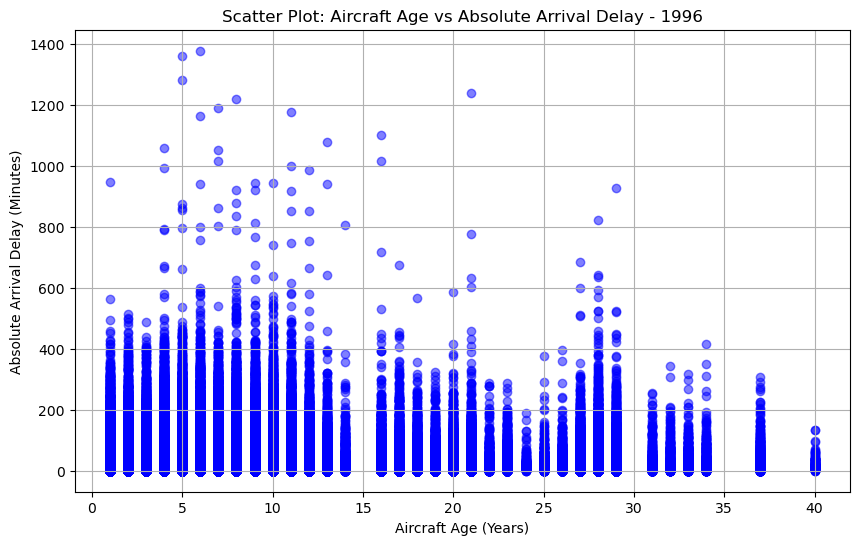

Correlation between Aircraft Age and Absolute Arrival Delay for 1996: -0.011017753203961535
Average Absolute Arrival Delay by Aircraft Age Group:
  AgeGroup  AbsArrDelay
0      0-5    16.668173
1     6-10    16.998450
2    11-15    18.441731
3    16-20    15.017437
4    21-25    17.407337
5    26-30    14.538293
6    31-35    17.424087
7    36-40    18.427409
8    41-45          NaN
9    45-50          NaN


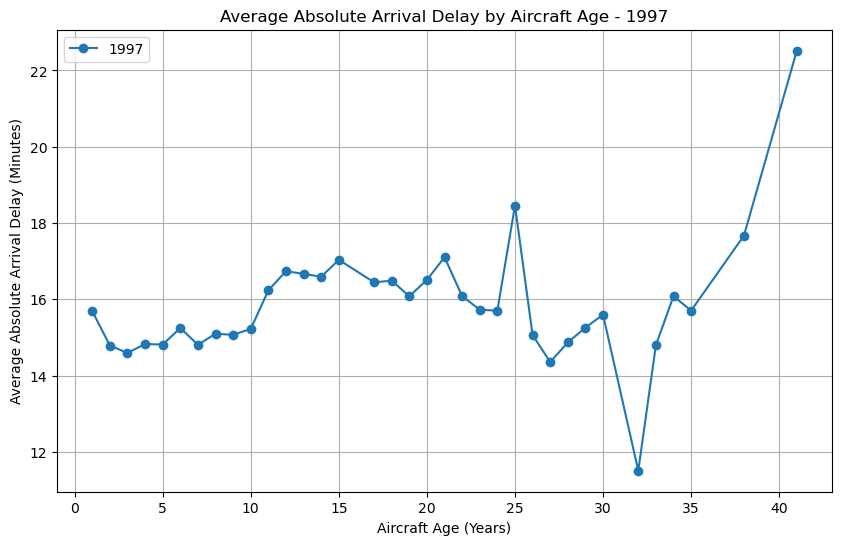

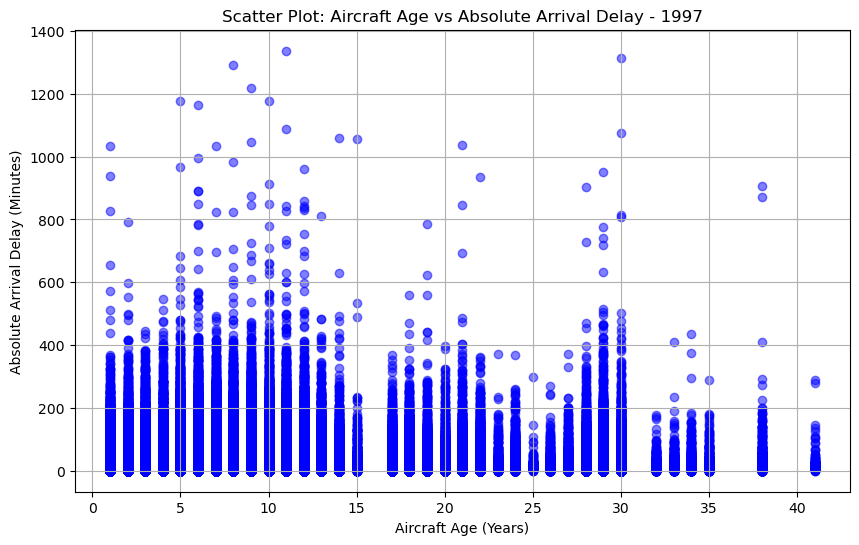

Correlation between Aircraft Age and Absolute Arrival Delay for 1997: 0.01053923650529319
Average Absolute Arrival Delay by Aircraft Age Group:
  AgeGroup  AbsArrDelay
0      0-5    15.805031
1     6-10    16.043481
2    11-15    17.447899
3    16-20    15.622961
4    21-25    17.010574
5    26-30    14.809977
6    31-35    15.972383
7    36-40    18.175261
8    41-45    22.517949
9    45-50          NaN


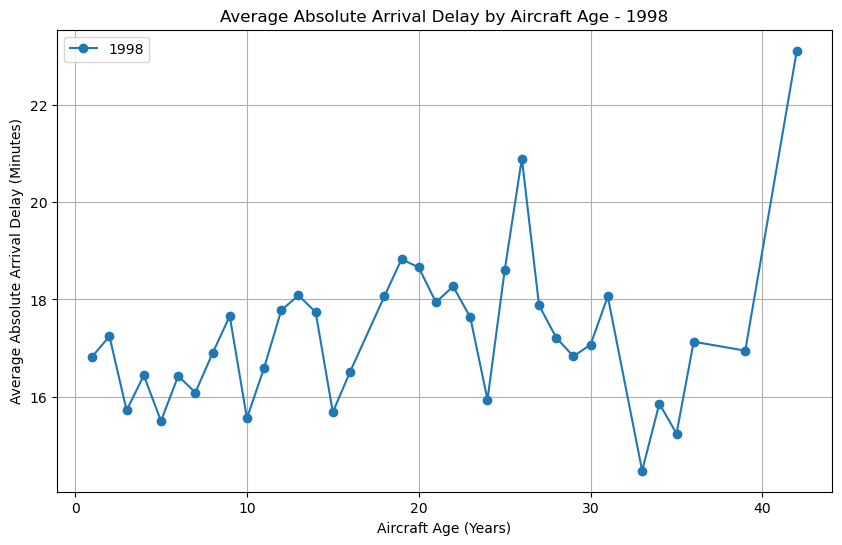

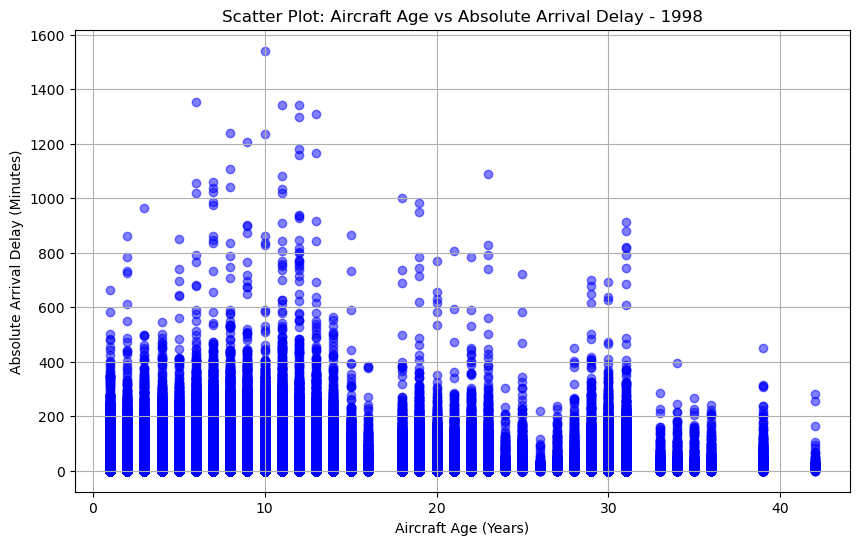

Correlation between Aircraft Age and Absolute Arrival Delay for 1998: 0.011588735662785718
Average Absolute Arrival Delay by Aircraft Age Group:
  AgeGroup  AbsArrDelay
0      0-5    15.985794
1     6-10    16.204452
2    11-15    17.350783
3    16-20    16.359280
4    21-25    17.232668
5    26-30    15.941844
6    31-35    15.952341
7    36-40    17.721272
8    41-45    22.814530
9    45-50          NaN


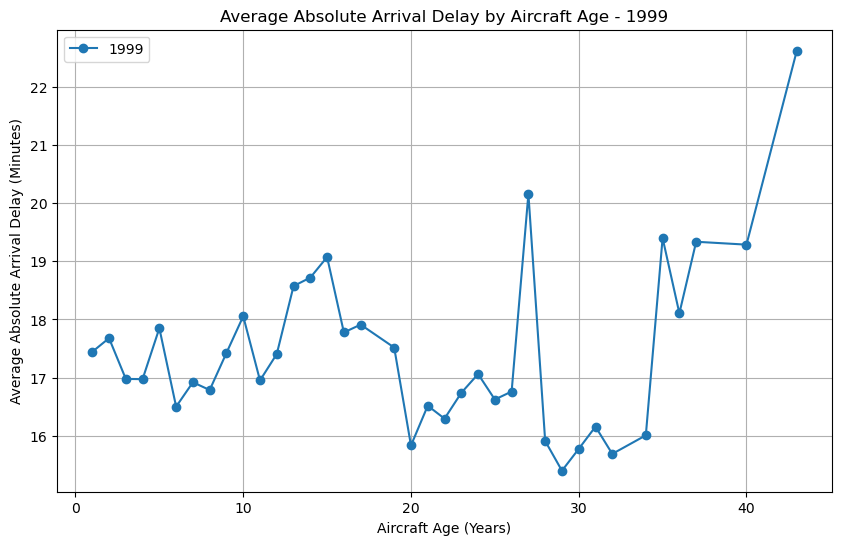

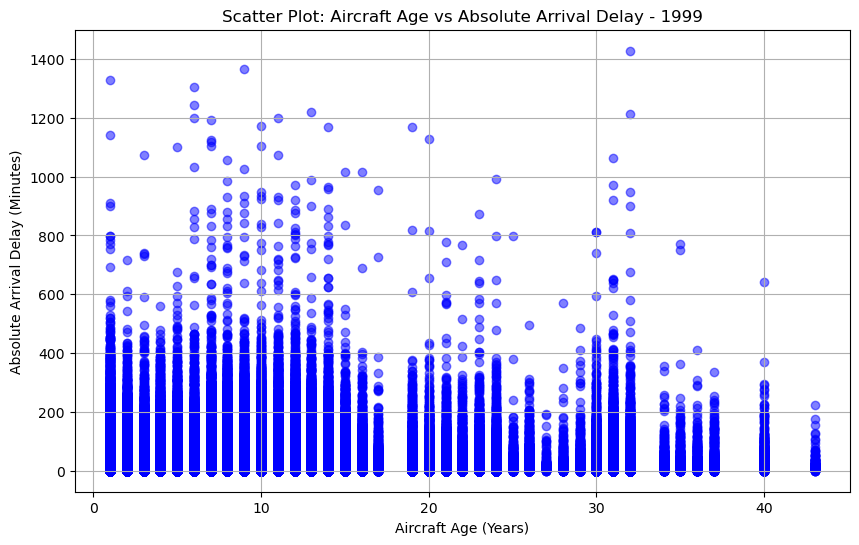

Correlation between Aircraft Age and Absolute Arrival Delay for 1999: -0.004155288750873052
Average Absolute Arrival Delay by Aircraft Age Group:
  AgeGroup  AbsArrDelay
0      0-5    16.335314
1     6-10    16.437544
2    11-15    17.559682
3    16-20    16.570952
4    21-25    17.086033
5    26-30    16.167685
6    31-35    16.167435
7    36-40    18.166833
8    41-45    22.750227
9    45-50          NaN


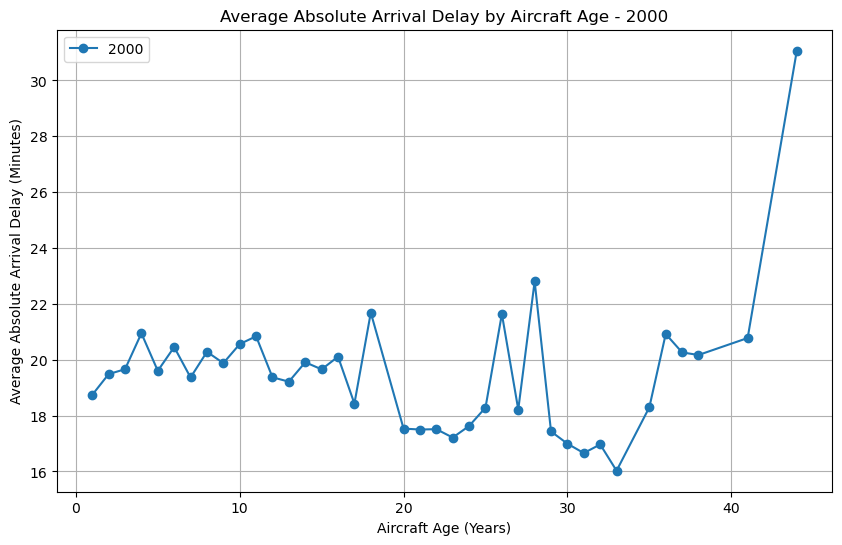

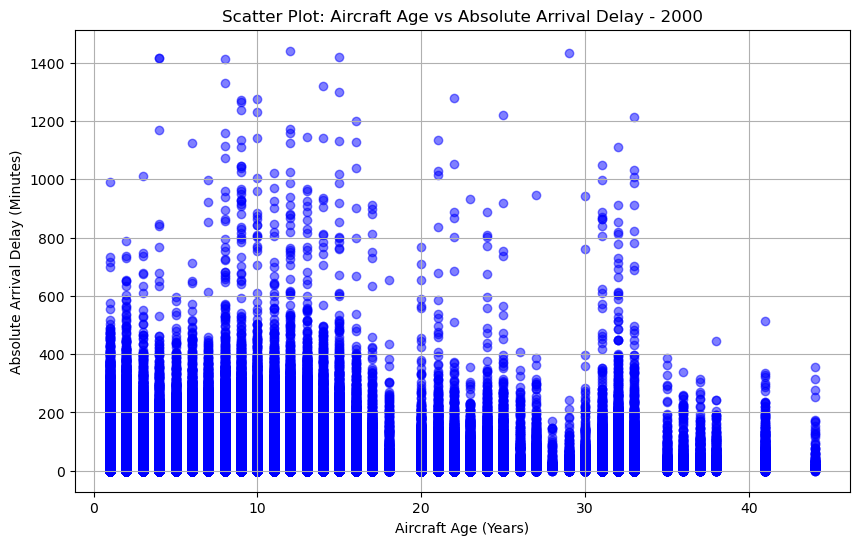

Correlation between Aircraft Age and Absolute Arrival Delay for 2000: -0.013605213278802758
Average Absolute Arrival Delay by Aircraft Age Group:
  AgeGroup  AbsArrDelay
0      0-5    17.005512
1     6-10    17.171380
2    11-15    18.025702
3    16-20    17.117104
4    21-25    17.194202
5    26-30    16.844364
6    31-35    16.331035
7    36-40    18.789471
8    41-45    24.017943
9    45-50          NaN


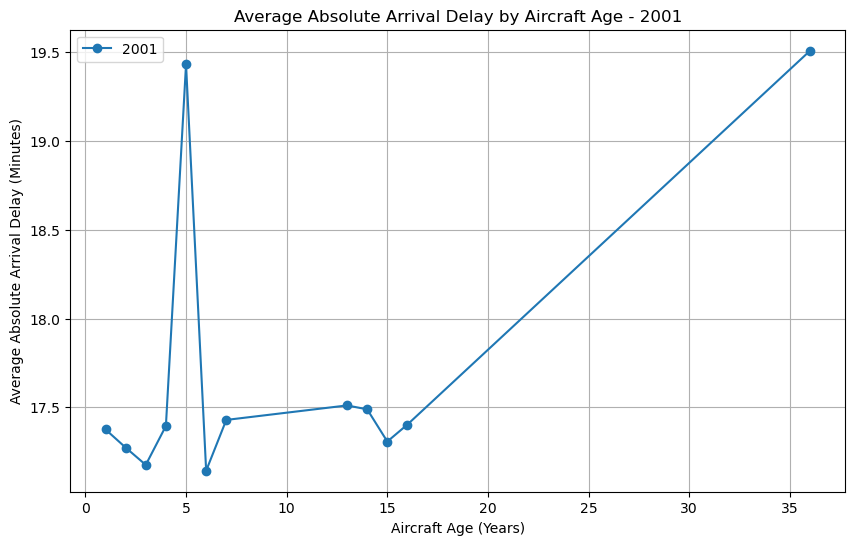

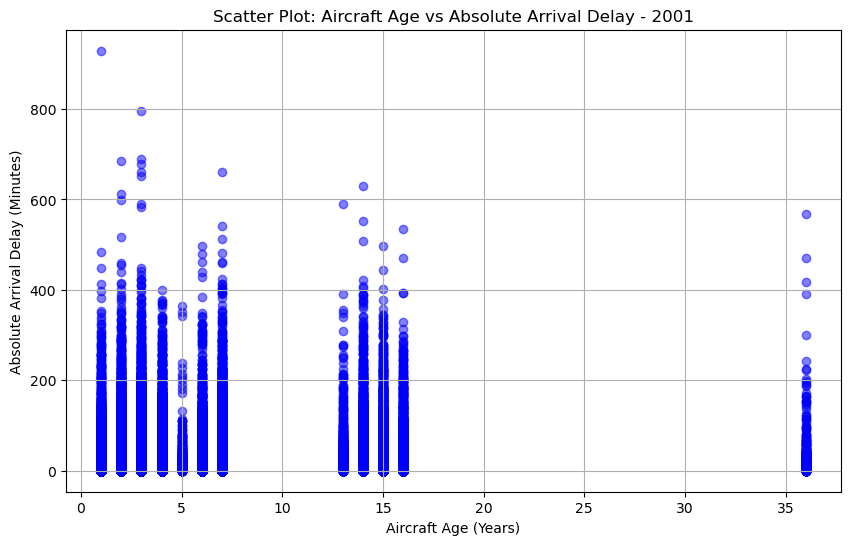

Correlation between Aircraft Age and Absolute Arrival Delay for 2001: 0.004063076579571194
Average Absolute Arrival Delay by Aircraft Age Group:
  AgeGroup  AbsArrDelay
0      0-5    17.126266
1     6-10    17.179851
2    11-15    17.960107
3    16-20    17.130101
4    21-25    17.194202
5    26-30    16.844364
6    31-35    16.331035
7    36-40    18.849447
8    41-45    24.017943
9    45-50          NaN


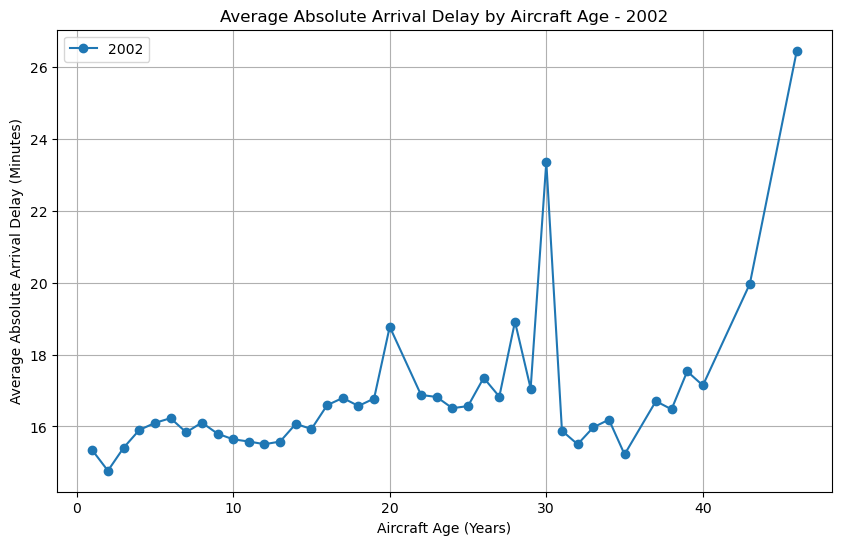

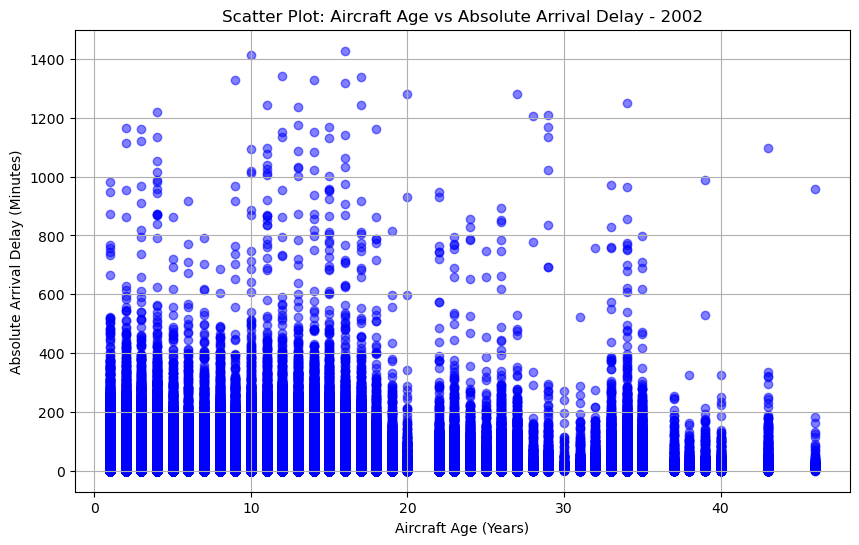

Correlation between Aircraft Age and Absolute Arrival Delay for 2002: 0.012389343588523137
Average Absolute Arrival Delay by Aircraft Age Group:
  AgeGroup  AbsArrDelay
0      0-5    16.894052
1     6-10    16.983292
2    11-15    17.611965
3    16-20    17.124688
4    21-25    17.124970
5    26-30    17.164902
6    31-35    16.215390
7    36-40    18.377917
8    41-45    23.343287
9    45-50    26.462766


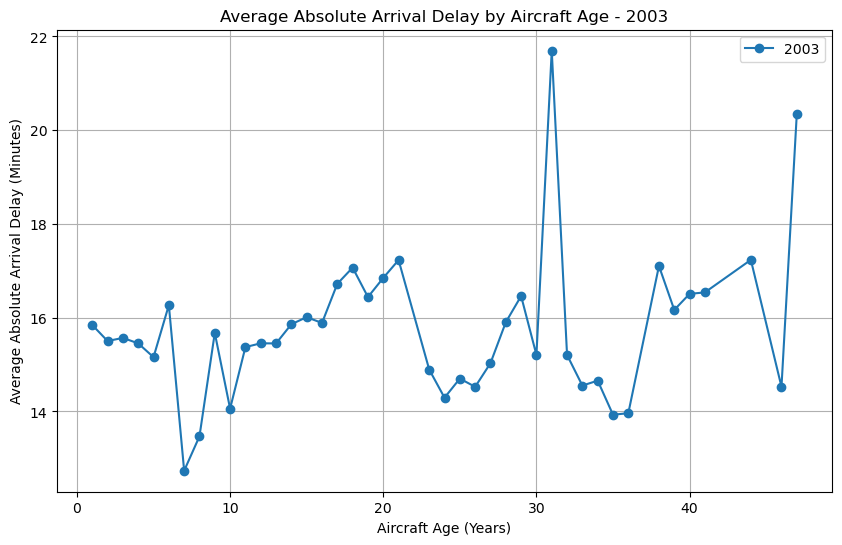

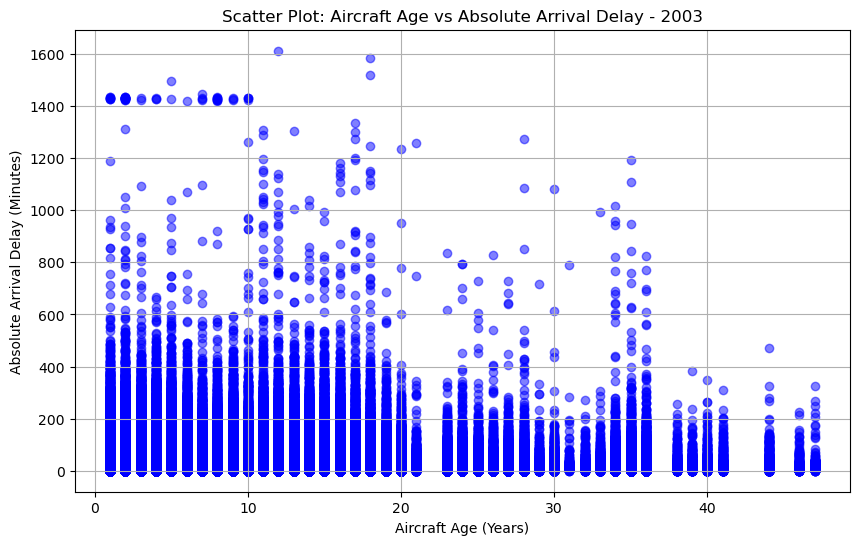

Correlation between Aircraft Age and Absolute Arrival Delay for 2003: -0.0005592105773497927
Average Absolute Arrival Delay by Aircraft Age Group:
  AgeGroup  AbsArrDelay
0      0-5    16.720494
1     6-10    16.639874
2    11-15    17.344173
3    16-20    17.041746
4    21-25    16.901315
5    26-30    16.909142
6    31-35    16.180835
7    36-40    17.889448
8    41-45    21.729188
9    45-50    20.445840


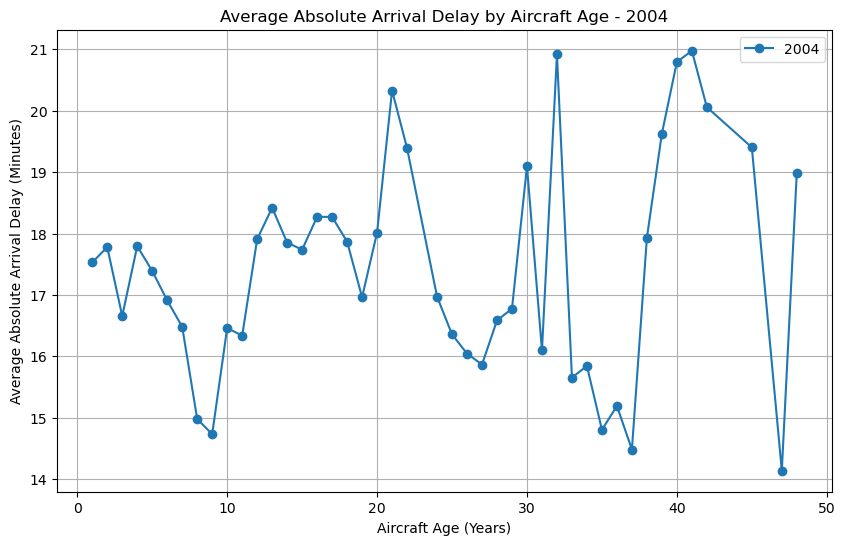

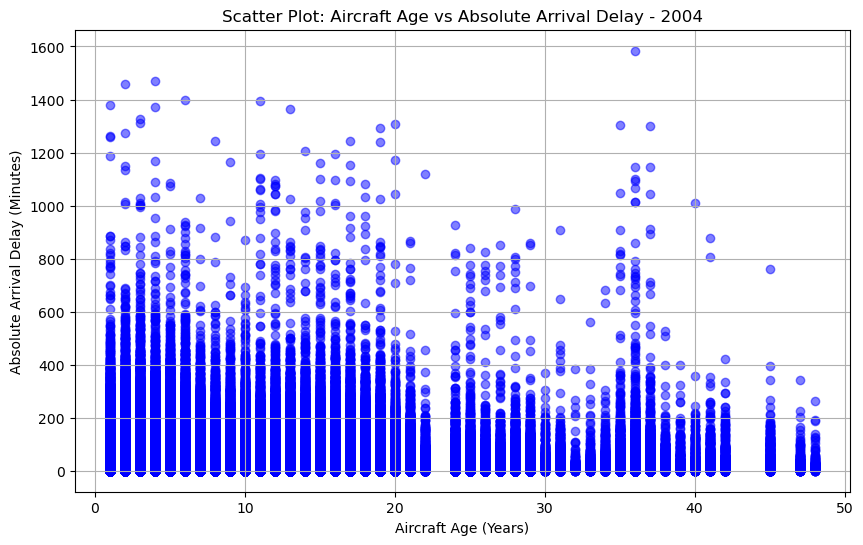

Correlation between Aircraft Age and Absolute Arrival Delay for 2004: -0.000788463605700714
Average Absolute Arrival Delay by Aircraft Age Group:
  AgeGroup  AbsArrDelay
0      0-5    16.799333
1     6-10    16.553298
2    11-15    17.380636
3    16-20    17.154746
4    21-25    17.048490
5    26-30    16.904499
6    31-35    16.249666
7    36-40    17.832666
8    41-45    21.297584
9    45-50    18.893381


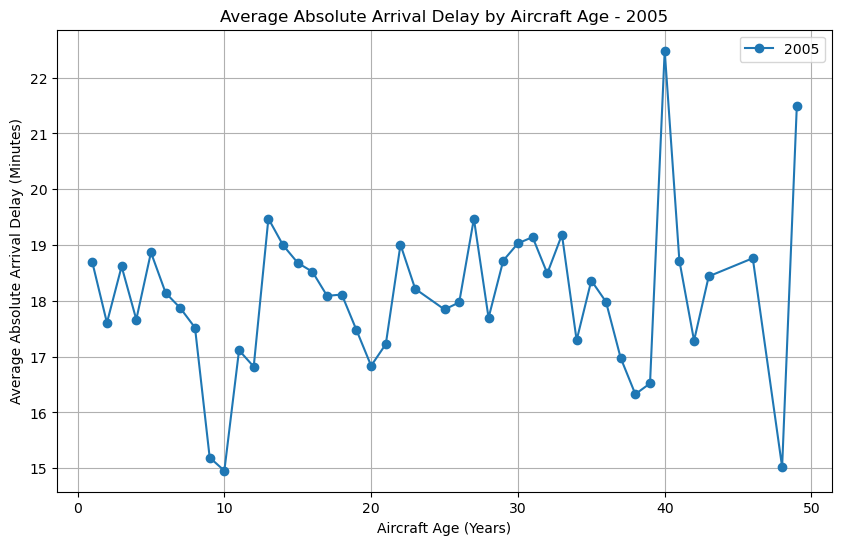

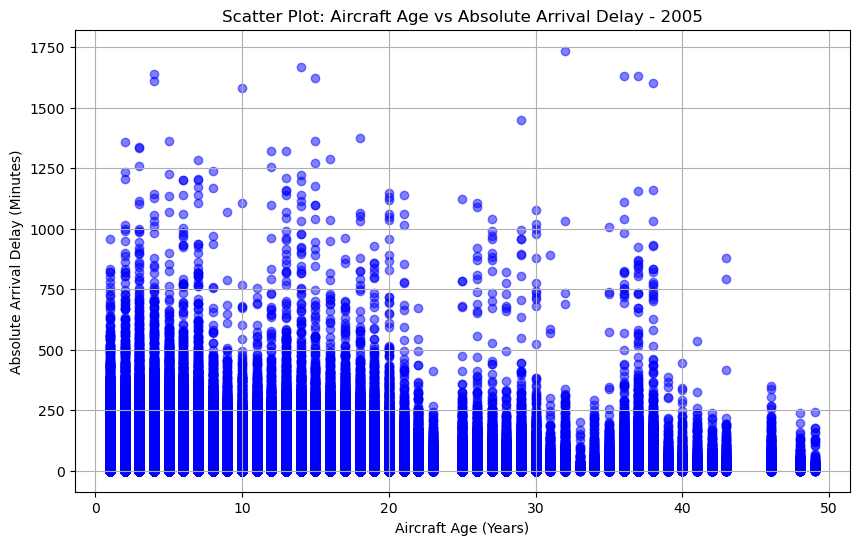

Correlation between Aircraft Age and Absolute Arrival Delay for 2005: -0.003711563259700987
Average Absolute Arrival Delay by Aircraft Age Group:
  AgeGroup  AbsArrDelay
0      0-5    16.948460
1     6-10    16.572774
2    11-15    17.469648
3    16-20    17.232440
4    21-25    17.148477
5    26-30    17.094669
6    31-35    16.530367
7    36-40    17.870251
8    41-45    20.622800
9    45-50    18.717156


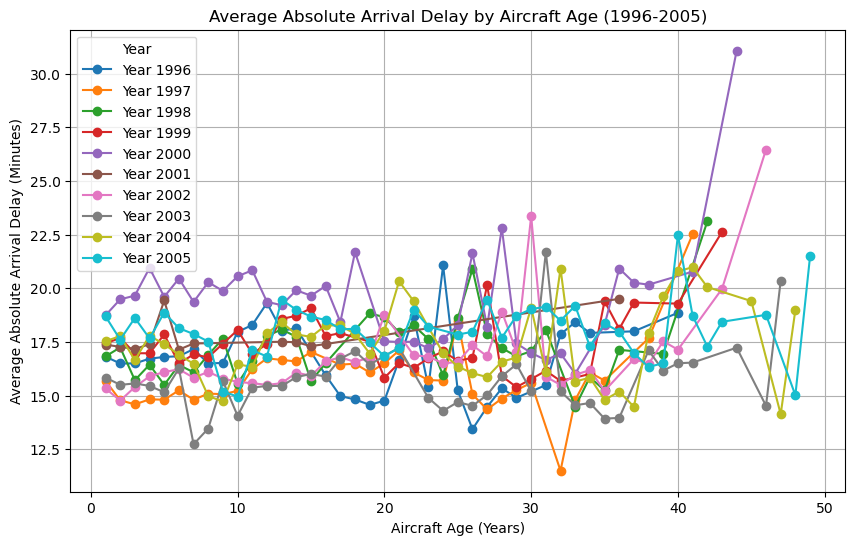

Summary Statistics for Each Year:
   YearOfAnalysis  mean_delay  median_delay  std_dev_delay  min_delay  \
0            1996   16.733184     16.687813       1.666393  13.437591   
1            1997   15.868941     15.701536       1.655782  11.504027   
2            1998   17.262040     17.102111       1.594684  14.481742   
3            1999   17.464693     17.061077       1.461431  15.398019   
4            2000   19.527484     19.543298       2.493373  16.024605   
5            2001   17.703330     17.398859       0.833158  17.142610   
6            2002   16.865355     16.352698       2.158787  14.765827   
7            2003   15.750899     15.535945       1.596822  12.736326   
8            2004   17.424570     17.460715       1.780573  14.136116   
9            2005   18.065006     18.113577       1.388606  14.956659   

   max_delay  
0  21.064815  
1  22.517949  
2  23.111111  
3  22.621622  
4  31.063107  
5  19.509178  
6  26.462766  
7  21.694704  
8  20.978090  
9  22.481064

In [51]:
#INCLUDES "DELAYS" AND "EARLY ARRIVALS"

# Average ABSOLUTE DELAYS.                                                                                                                                                                                  


# List of years from 1996 to 2005 for the analysis
years_of_analysis = range(1996, 2006)

# Initialize an empty DataFrame to hold combined data for all years
combined_df = pd.DataFrame()

# Loop through each year
for year_of_analysis in years_of_analysis:
    # Step 1: Query only ArrDelay and TailNum from the current year and join with ManufactureYear
    query = f'''
    SELECT f.ArrDelay, f.TailNum, p.Year as ManufactureYear
    FROM "{year_of_analysis}" f  
    LEFT JOIN "plane-data" p ON f.TailNum = p.TailNum
    WHERE f.Year = ?;  
    '''
    
    # Execute the query with the year_of_analysis parameter
    df = pd.read_sql_query(query, conn, params=(year_of_analysis,))

    # Step 2: Data Preprocessing
    df['ArrDelay'] = pd.to_numeric(df['ArrDelay'], errors='coerce')  # Ensure ArrDelay is numeric
    df['ManufactureYear'] = pd.to_numeric(df['ManufactureYear'], errors='coerce')  # Convert ManufactureYear to numeric

    df.dropna(subset=['ArrDelay', 'ManufactureYear'], inplace=True)  # Remove rows with missing

    # Step 3: Count invalid values
    same_year_count = (df['ManufactureYear'] == year_of_analysis).sum()
    beyond_year_count = (df['ManufactureYear'] > year_of_analysis).sum()

    # Identify indices of rows to drop
    indices_to_drop = df[
        (df['ManufactureYear'] == year_of_analysis) |  # Same year
        (df['ManufactureYear'] > year_of_analysis) |   # Beyond year of analysis
        (df['ManufactureYear'] == 0)                   # Zero values
    ].index

    # Drop those indices from the DataFrame
    df.drop(indices_to_drop, inplace=True)

    # Step 4: Calculate Aircraft Age
    df['AircraftAge'] = year_of_analysis - df['ManufactureYear']

    # Step 5: Take absolute value of Arrival Delay
    df['AbsArrDelay'] = df['ArrDelay'].abs()

    # Step 6: Group by AircraftAge and calculate average absolute arrival delay
    avg_abs_delay_by_age = df.groupby('AircraftAge')['AbsArrDelay'].mean().reset_index()

    # Add current year to the DataFrame
    avg_abs_delay_by_age['YearOfAnalysis'] = year_of_analysis

    # Append the current year's data to the combined DataFrame
    combined_df = pd.concat([combined_df, avg_abs_delay_by_age], ignore_index=True)

    # Step 7: Plot the line chart for each year
    plt.figure(figsize=(10, 6))
    plt.plot(avg_abs_delay_by_age['AircraftAge'], avg_abs_delay_by_age['AbsArrDelay'], linestyle='-', marker='o', label=f'{year_of_analysis}')

    # Step 8: Customize the plot for each year
    plt.title(f'Average Absolute Arrival Delay by Aircraft Age - {year_of_analysis}')
    plt.xlabel('Aircraft Age (Years)')
    plt.ylabel('Average Absolute Arrival Delay (Minutes)')
    plt.grid(True)
    plt.legend()

    # Step 9: Plot scatter plot for the current year
    plt.figure(figsize=(10, 6))
    plt.scatter(df['AircraftAge'], df['AbsArrDelay'], alpha=0.5, c='blue')
    plt.title(f'Scatter Plot: Aircraft Age vs Absolute Arrival Delay - {year_of_analysis}')
    plt.xlabel('Aircraft Age (Years)')
    plt.ylabel('Absolute Arrival Delay (Minutes)')
    plt.grid(True)
    
    # Show both plots
    plt.show()

    # Step 10: Calculate and print correlation between Aircraft Age and Arrival Delay
    correlation = df['AircraftAge'].corr(df['AbsArrDelay'])
    print(f"Correlation between Aircraft Age and Absolute Arrival Delay for {year_of_analysis}: {correlation}")

    # Step 11: Create age groups for combined data
    bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]  # Define bins for age groups
    labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '45-50']
    combined_df['AgeGroup'] = pd.cut(combined_df['AircraftAge'], bins=bins, labels=labels)

    # Calculate average absolute delay by age group
    avg_abs_delay_by_age_group = combined_df.groupby('AgeGroup')['AbsArrDelay'].mean().reset_index()
    print("Average Absolute Arrival Delay by Aircraft Age Group:")
    print(avg_abs_delay_by_age_group)

# Step 12: Plot the combined results
plt.figure(figsize=(10, 6))

# Iterate over each year and plot the average absolute delay by aircraft age
for year in years_of_analysis:
    yearly_data = combined_df[combined_df['YearOfAnalysis'] == year]
    plt.plot(yearly_data['AircraftAge'], yearly_data['AbsArrDelay'], label=f'Year {year}', marker='o', linestyle='-')

# Step 13: Customize the plot
plt.title('Average Absolute Arrival Delay by Aircraft Age (1996-2005)')
plt.xlabel('Aircraft Age (Years)')
plt.ylabel('Average Absolute Arrival Delay (Minutes)')
plt.legend(title='Year')
plt.grid(True)

# Display the plot
plt.show()

# Summary statistics and year-on-year comparison
summary_stats = combined_df.groupby('YearOfAnalysis').agg(
    mean_delay=('AbsArrDelay', 'mean'),
    median_delay=('AbsArrDelay', 'median'),
    std_dev_delay=('AbsArrDelay', 'std'),
    min_delay=('AbsArrDelay', 'min'),
    max_delay=('AbsArrDelay', 'max')
).reset_index()

print("Summary Statistics for Each Year:")
print(summary_stats)

# Calculate year-on-year change in mean delay
summary_stats['YoY Change in Mean Delay'] = summary_stats['mean_delay'].diff()
print("\nYear-on-Year Change in Mean Absolute Delay:")
print(summary_stats[['YearOfAnalysis', 'YoY Change in Mean Delay']])


In [52]:
yearly_data

AircraftAge  AbsArrDelay  YearOfAnalysis AgeGroup
318          1.0    18.695563            2005      0-5
319          2.0    17.607076            2005      0-5
320          3.0    18.616994            2005      0-5
321          4.0    17.665793            2005      0-5
322          5.0    18.867567            2005      0-5
323          6.0    18.142629            2005     6-10
324          7.0    17.870182            2005     6-10
325          8.0    17.519411            2005     6-10
326          9.0    15.193012            2005     6-10
327         10.0    14.956659            2005     6-10
328         11.0    17.114456            2005    11-15
329         12.0    16.820994            2005    11-15
330         13.0    19.473891            2005    11-15
331         14.0    18.996702            2005    11-15
332         15.0    18.680700            2005    11-15
333         16.0    18.521146            2005    16-20
334         17.0    18.089020            2005    16-20
335         18.0    18.113577            2005    16-20
336         19.0    17.476992            2005    16-20
337         20.0    16.836139            2005    16-20
338         21.0    17.225671            2005    21-25
339         22.0    19.006715            2005    21-25
340         23.0    18.215637            2005    21-25
341         25.0    17.845376            2005    21-25
342         26.0    17.972459            2005    26-30
343         27.0    19.471158            2005    26-30
344         28.0    17.695947            2005    26-30
345         29.0    18.720422            2005    26-30
346         30.0    19.029990            2005    26-30
347         31.0    19.142012            2005    31-35
348         32.0    18.491679            2005    31-35
349         33.0    19.184739            2005    31-35
350         34.0    17.293936            2005    31-35
351         35.0    18.363986            2005    31-35
352         36.0    17.982925            2005    36-40
353         37.0    16.977634            2005    36-40
354         38.0    16.328103            2005    36-40
355         39.0    16.521173            2005    36-40
356         40.0    22.481064            2005    36-40
357         41.0    18.719640            2005    41-45
358         42.0    17.287260            2005    41-45
359         43.0    18.438876            2005    41-45
360         46.0    18.763747            2005    45-50
361         48.0    15.022472            2005    45-50
362         49.0    21.484127            2005    45-50

### Removing Early Arrivals from the  Delays (Negative Values) 
### For Meaningful Analysis

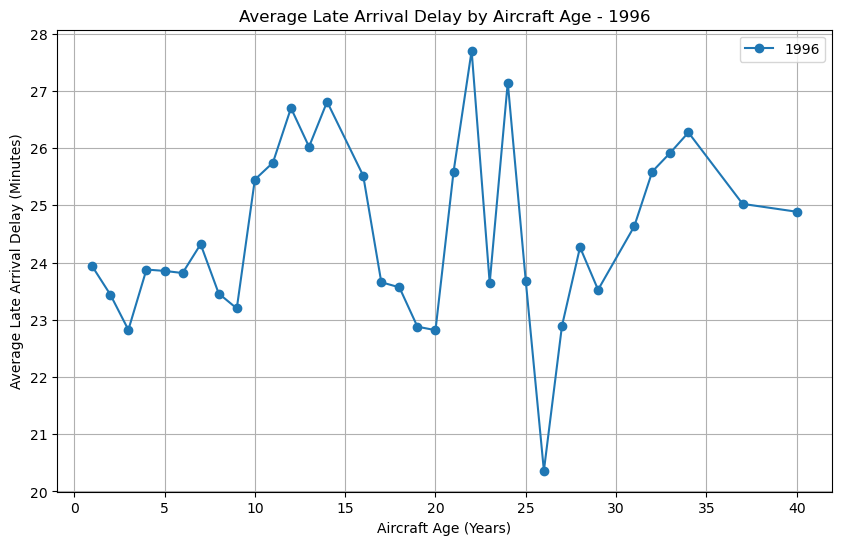

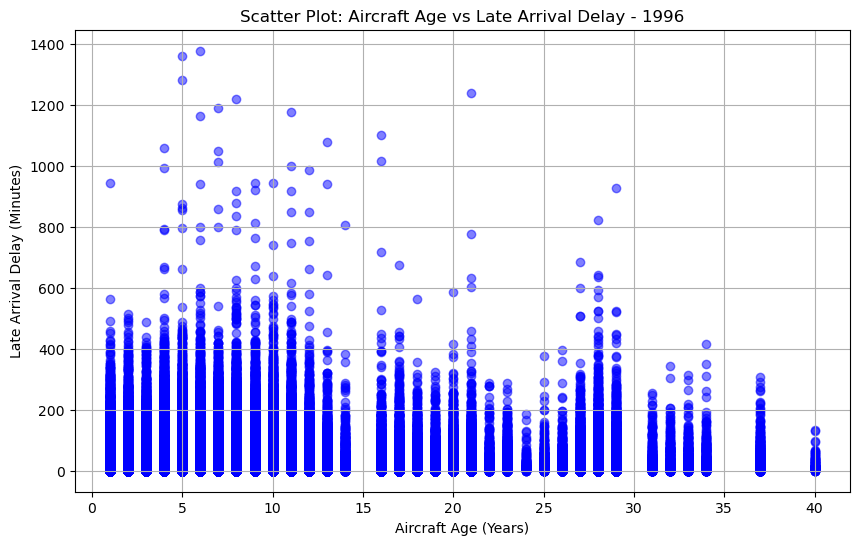

Correlation between Aircraft Age and LateArrDelay Arrival Delay for 1996: 0.00514502475330993
Average Late Arrival Delay by Aircraft Age Group:
  AgeGroup  LateArrDelay
0      0-5     23.586240
1     6-10     24.049049
2    11-15     26.319629
3    16-20     23.687537
4    21-25     25.549501
5    26-30     22.761449
6    31-35     25.603526
7    36-40     24.956725
8    41-45           NaN
9    45-50           NaN


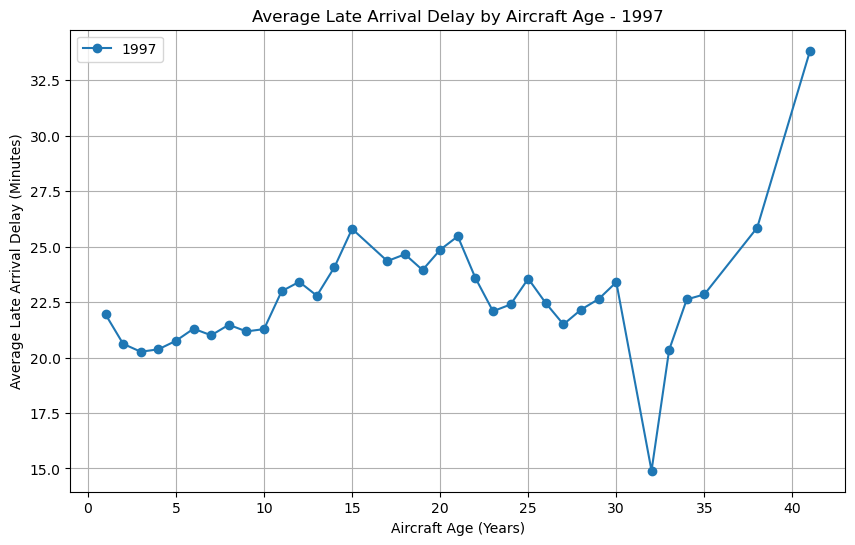

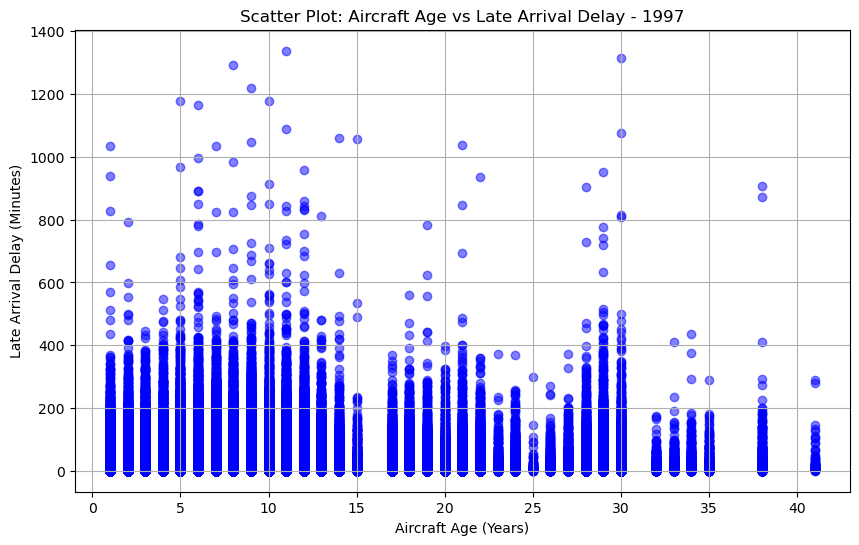

Correlation between Aircraft Age and LateArrDelay Arrival Delay for 1997: 0.021815241822462913
Average Late Arrival Delay by Aircraft Age Group:
  AgeGroup  LateArrDelay
0      0-5     22.187293
1     6-10     22.647311
2    11-15     24.925408
3    16-20     24.025527
4    21-25     24.482180
5    26-30     22.574648
6    31-35     22.889431
7    36-40     25.254972
8    41-45     33.822785
9    45-50           NaN


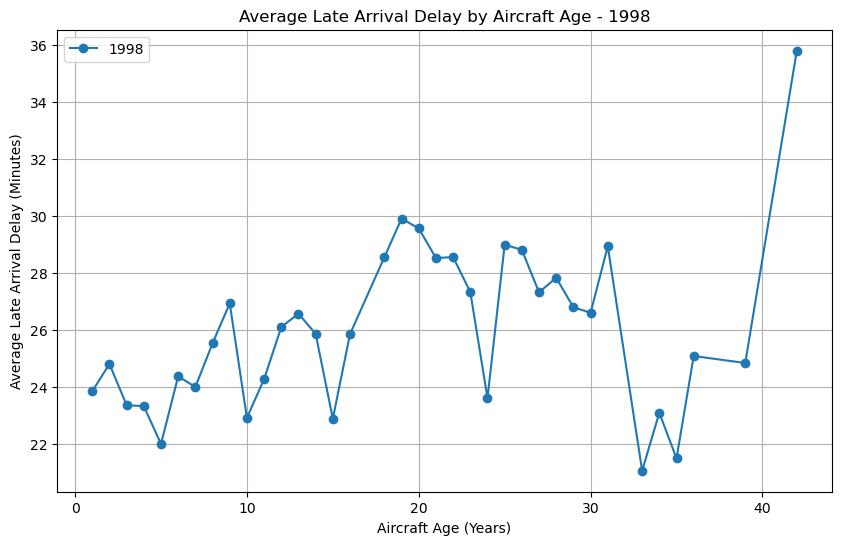

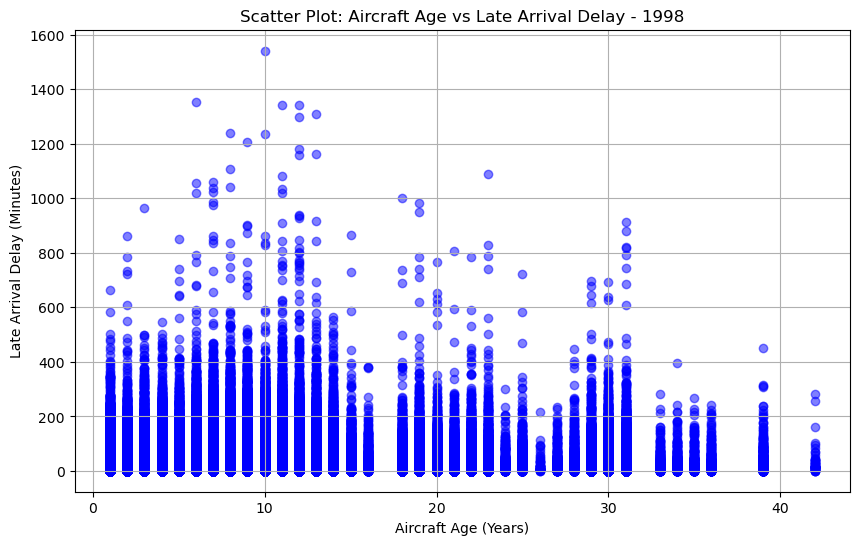

Correlation between Aircraft Age and LateArrDelay Arrival Delay for 1998: 0.0241309734813122
Average Late Arrival Delay by Aircraft Age Group:
  AgeGroup  LateArrDelay
0      0-5     22.609219
1     6-10     23.343467
2    11-15     24.996850
3    16-20     25.389288
4    21-25     25.451348
5    26-30     24.318889
6    31-35     23.136415
7    36-40     25.132321
8    41-45     34.806129
9    45-50           NaN


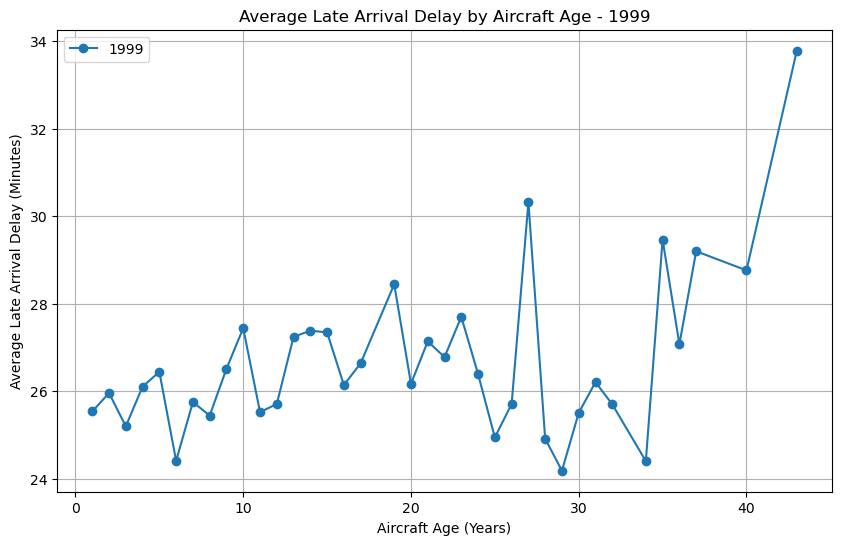

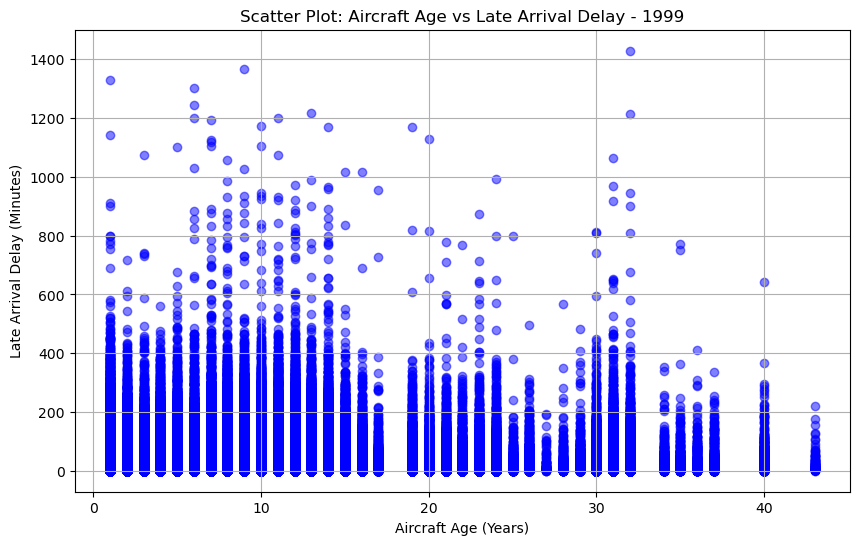

Correlation between Aircraft Age and LateArrDelay Arrival Delay for 1999: 0.006757477567090356
Average Late Arrival Delay by Aircraft Age Group:
  AgeGroup  LateArrDelay
0      0-5     23.419028
1     6-10     23.985542
2    11-15     25.429254
3    16-20     25.732700
4    21-25     25.736351
5    26-30     24.794691
6    31-35     23.963388
7    36-40     26.337085
8    41-45     34.464956
9    45-50           NaN


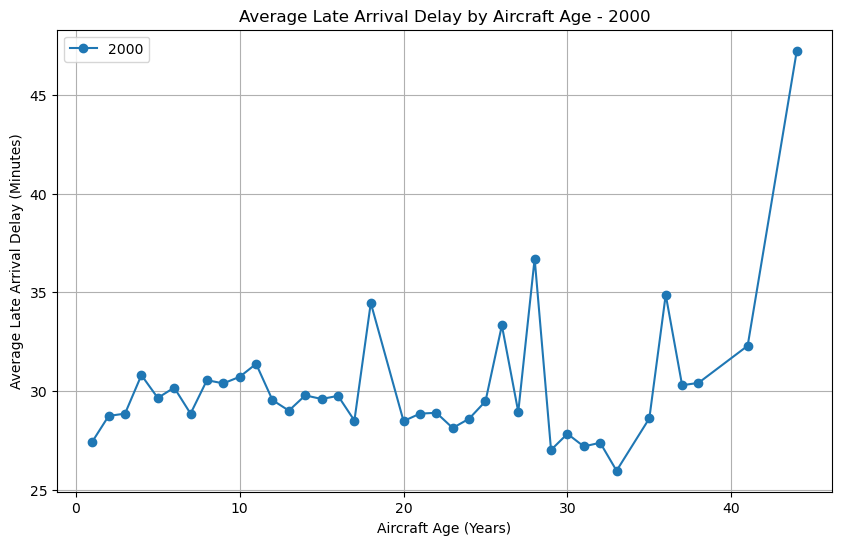

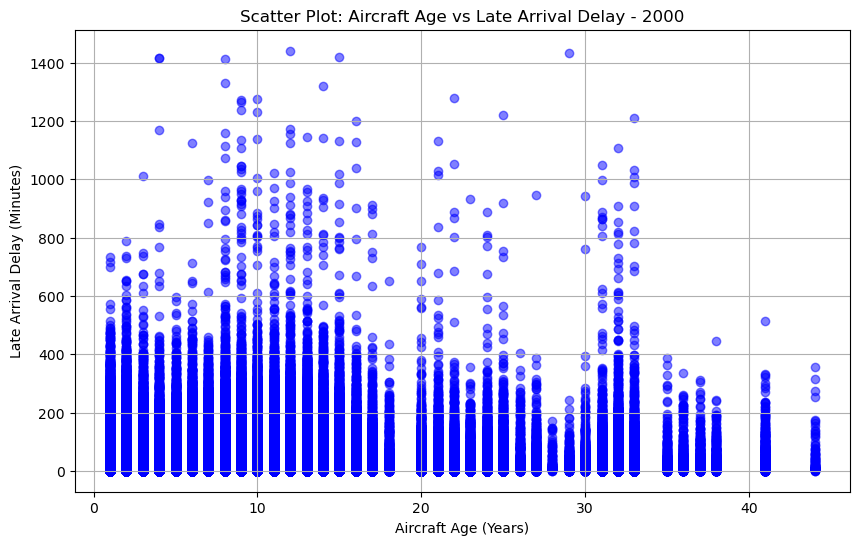

Correlation between Aircraft Age and LateArrDelay Arrival Delay for 2000: -7.368100865272131e-05
Average Late Arrival Delay by Aircraft Age Group:
  AgeGroup  LateArrDelay
0      0-5     24.555028
1     6-10     25.216271
2    11-15     26.352769
3    16-20     26.602923
4    21-25     26.348040
5    26-30     26.038829
6    31-35     24.629176
7    36-40     27.843814
8    41-45     36.582976
9    45-50           NaN


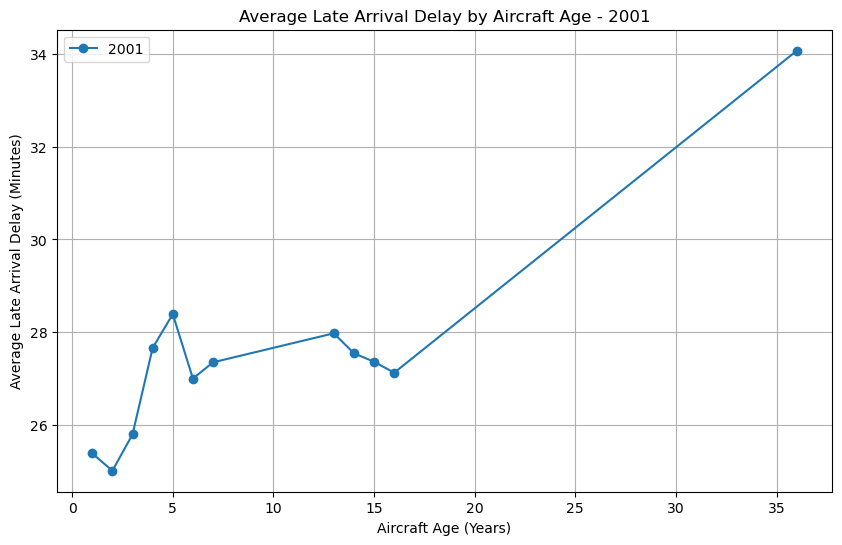

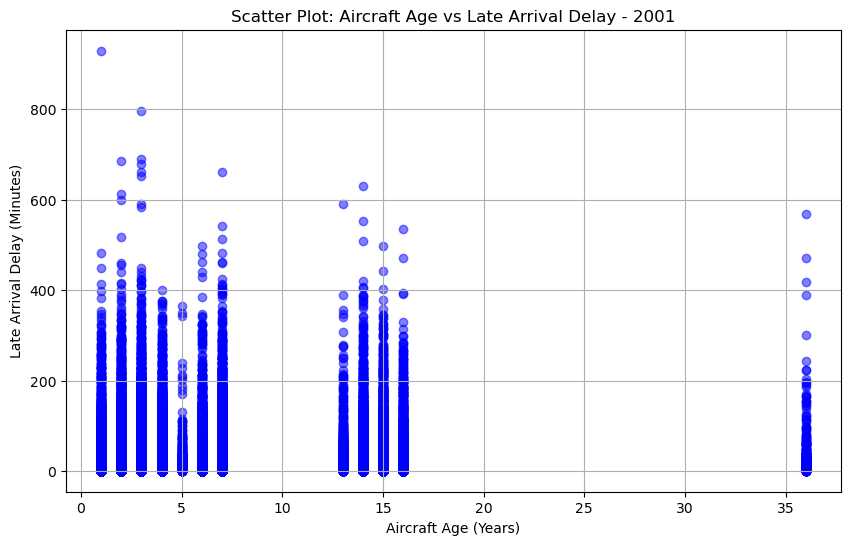

Correlation between Aircraft Age and LateArrDelay Arrival Delay for 2001: 0.02031517745537315
Average Late Arrival Delay by Aircraft Age Group:
  AgeGroup  LateArrDelay
0      0-5     24.869664
1     6-10     25.360995
2    11-15     26.493952
3    16-20     26.626482
4    21-25     26.348040
5    26-30     26.038829
6    31-35     24.629176
7    36-40     28.363256
8    41-45     36.582976
9    45-50           NaN


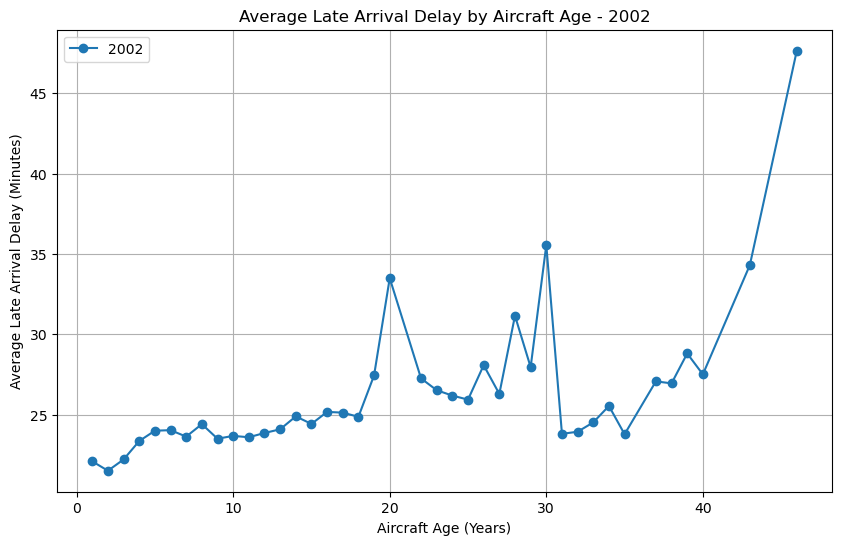

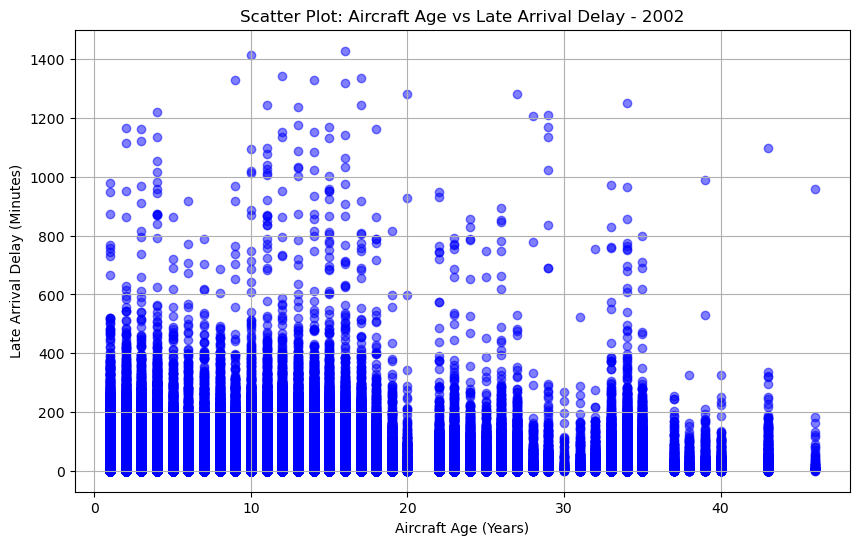

Correlation between Aircraft Age and LateArrDelay Arrival Delay for 2002: 0.02708384297934569
Average Late Arrival Delay by Aircraft Age Group:
  AgeGroup  LateArrDelay
0      0-5     24.549312
1     6-10     25.124123
2    11-15     26.130024
3    16-20     26.735507
4    21-25     26.364759
5    26-30     26.687932
6    31-35     24.565357
7    36-40     28.167117
8    41-45     36.203051
9    45-50     47.655738


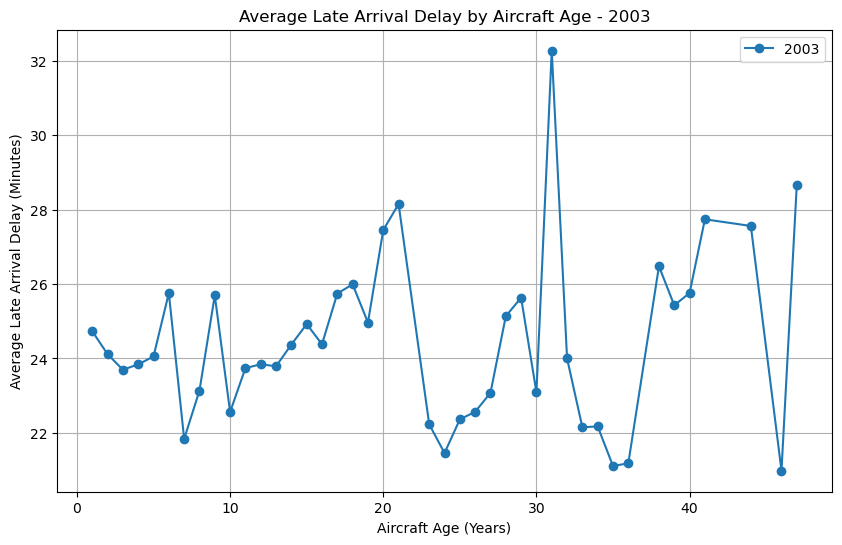

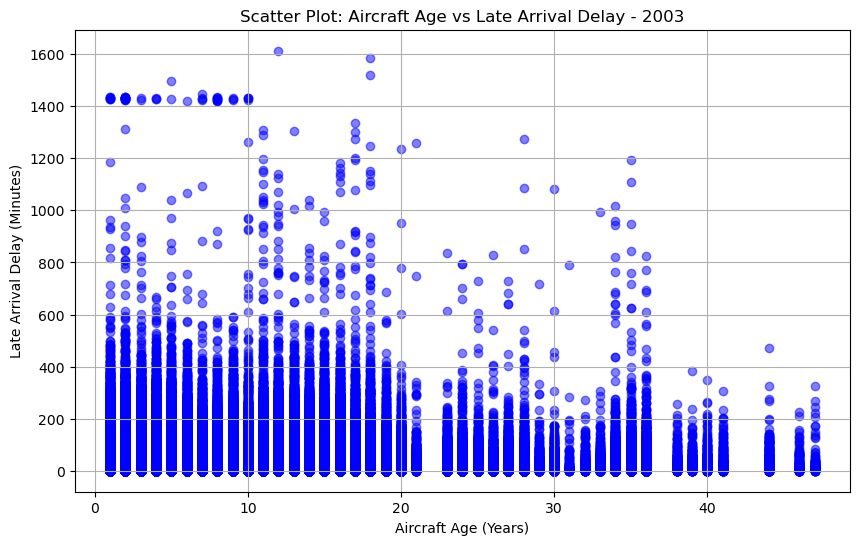

Correlation between Aircraft Age and LateArrDelay Arrival Delay for 2003: -0.003408082814671
Average Late Arrival Delay by Aircraft Age Group:
  AgeGroup  LateArrDelay
0      0-5     24.491713
1     6-10     24.945047
2    11-15     25.860482
3    16-20     26.574699
4    21-25     26.023762
5    26-30     26.278058
6    31-35     24.528042
7    36-40     27.476254
8    41-45     34.064199
9    45-50     32.437934


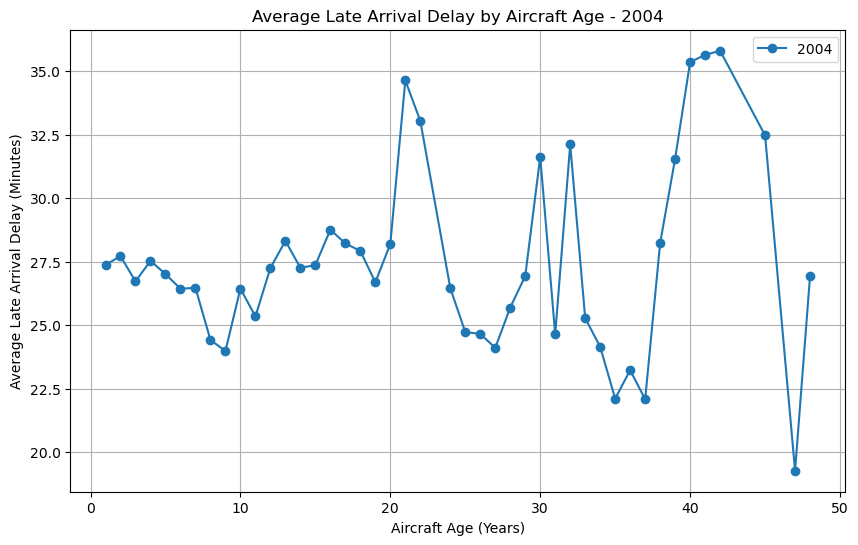

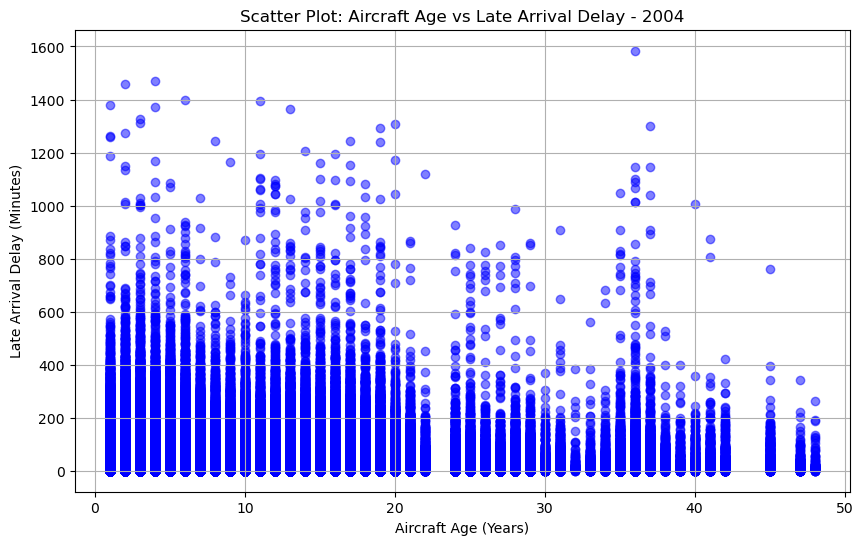

Correlation between Aircraft Age and LateArrDelay Arrival Delay for 2004: -0.003516397239724726
Average Late Arrival Delay by Aircraft Age Group:
  AgeGroup  LateArrDelay
0      0-5     24.800511
1     6-10     25.017030
2    11-15     26.008836
3    16-20     26.761339
4    21-25     26.422783
5    26-30     26.319743
6    31-35     24.689269
7    36-40     27.599287
8    41-45     34.220139
9    45-50     28.705491


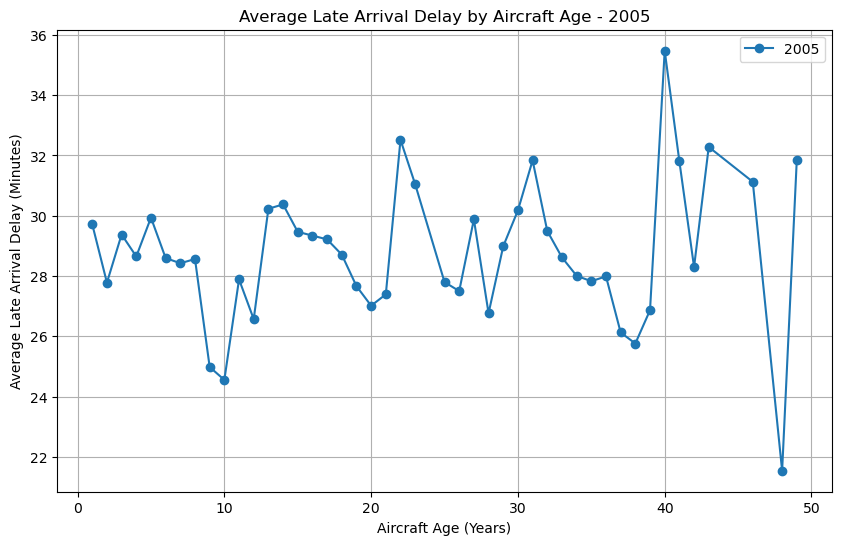

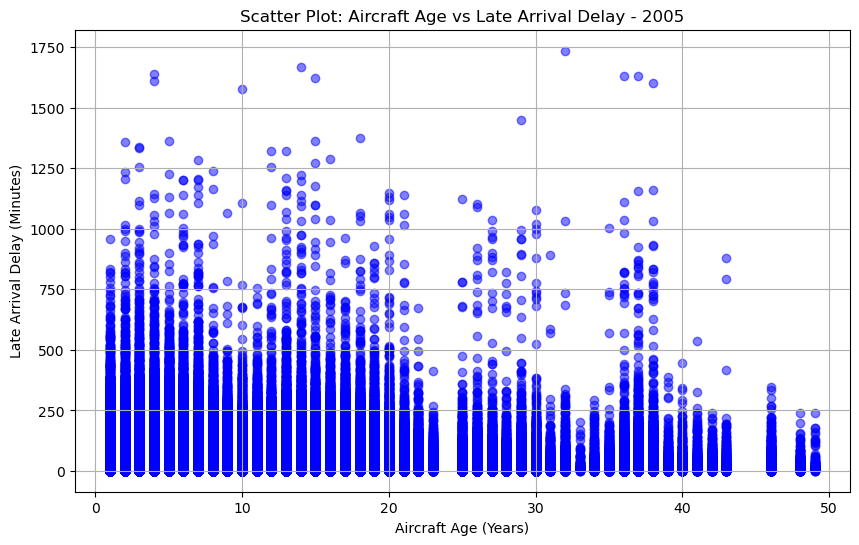

Correlation between Aircraft Age and LateArrDelay Arrival Delay for 2005: -0.005190877231573327
Average Late Arrival Delay by Aircraft Age Group:
  AgeGroup  LateArrDelay
0      0-5     25.229571
1     6-10     25.230307
2    11-15     26.316987
3    16-20     26.955022
4    21-25     26.741395
5    26-30     26.585818
6    31-35     25.247585
7    36-40     27.739830
8    41-45     33.486245
9    45-50     28.506284


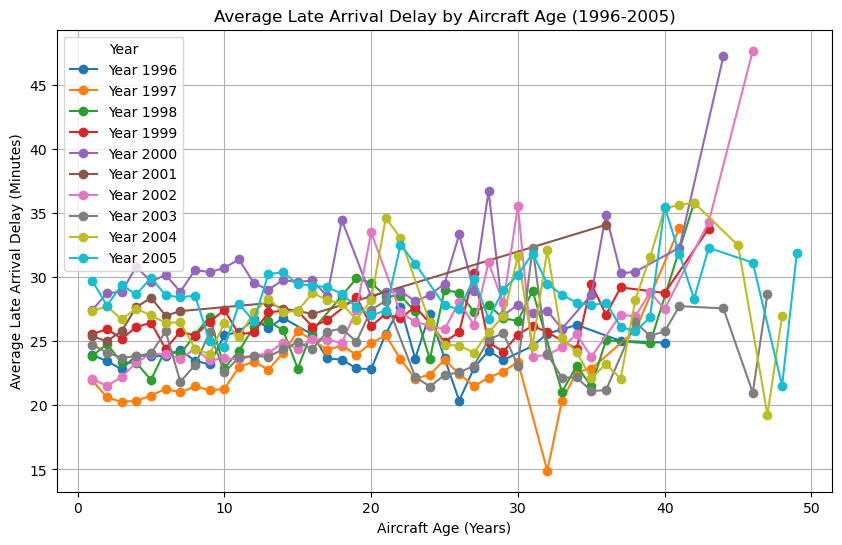

Summary Statistics for Each Year:
   YearOfAnalysis  mean_delay  median_delay  std_dev_delay  min_delay  \
0            1996   24.500397     24.100776       1.544435  20.362701   
1            1997   22.759649     22.617302       2.804590  14.898990   
2            1998   25.968089     25.845351       2.950157  21.044369   
3            1999   26.691421     26.207659       1.859847  24.182870   
4            2000   30.231277     29.513003       3.587477  25.968149   
5            2001   27.551908     27.351580       2.303615  25.003964   
6            2002   26.449519     25.003123       4.668511  21.502553   
7            2003   24.473050     24.085212       2.331957  20.987179   
8            2004   27.503457     26.976837       3.717664  19.271984   
9            2005   28.755422     28.616667       2.376843  21.536534   

   max_delay  
0  27.701531  
1  33.822785  
2  35.789474  
3  33.782609  
4  47.228571  
5  34.077121  
6  47.655738  
7  32.262774  
8  35.801556  
9  35.477080

In [53]:


#ONLY Delays (Not early Arrivals)

# List of years from 1996 to 2005 for the analysis
years_of_analysis = range(1996, 2006)

# Empty DataFrame to hold combined data for all years
combined_df = pd.DataFrame()

# Looping through each year
for year_of_analysis in years_of_analysis:
    
    query = f'''
    SELECT f.ArrDelay, f.TailNum, p.Year as ManufactureYear
    FROM "{year_of_analysis}" f  
    LEFT JOIN "plane-data" p ON f.TailNum = p.TailNum
    WHERE f.Year = ?;  
    '''
    
    
    df = pd.read_sql_query(query, conn, params=(year_of_analysis,))

    # Data Preprocessing
    df['ArrDelay'] = pd.to_numeric(df['ArrDelay'], errors='coerce')  # Ensure ArrDelay is numeric
    df['ManufactureYear'] = pd.to_numeric(df['ManufactureYear'], errors='coerce')  # Convert ManufactureYear to numeric

    # Removing early arrivals (negative ArrDelay)
    df = df[df['ArrDelay'] > 0]  

    # Dropping rows with missing data 
    df.dropna(subset=['ArrDelay', 'ManufactureYear'], inplace=True)

   
    same_year_count = (df['ManufactureYear'] == year_of_analysis).sum()
    beyond_year_count = (df['ManufactureYear'] > year_of_analysis).sum()

   
    indices_to_drop = df[
        (df['ManufactureYear'] == year_of_analysis) |  # Same year
        (df['ManufactureYear'] > year_of_analysis) |   # Beyond year of analysis
        (df['ManufactureYear'] == 0)                   # Zero values
    ].index

    
    df.drop(indices_to_drop, inplace=True)

    # S Aircraft Age
    df['AircraftAge'] = year_of_analysis - df['ManufactureYear']

    # Taking absolute value of Arrival Delay (only positive delays remain)
    df['LateArrDelay'] = df['ArrDelay'].abs()

    # Group by AircraftAge and calculate average absolute arrival delay
    avg_abs_delay_by_age = df.groupby('AircraftAge')['LateArrDelay'].mean().reset_index()

    # Adding current year to the DataFrame
    avg_abs_delay_by_age['YearOfAnalysis'] = year_of_analysis

    # Appending the current year's data to the combined DataFrame
    combined_df = pd.concat([combined_df, avg_abs_delay_by_age], ignore_index=True)

    # Plotting the line chart for each year
    plt.figure(figsize=(10, 6))
    plt.plot(avg_abs_delay_by_age['AircraftAge'], avg_abs_delay_by_age['LateArrDelay'], linestyle='-', marker='o', label=f'{year_of_analysis}')


    plt.title(f'Average Late Arrival Delay by Aircraft Age - {year_of_analysis}')
    plt.xlabel('Aircraft Age (Years)')
    plt.ylabel('Average Late Arrival Delay (Minutes)')
    plt.grid(True)
    plt.legend()

    # Plotting scatter plot for the current year
    plt.figure(figsize=(10, 6))
    plt.scatter(df['AircraftAge'], df['LateArrDelay'], alpha=0.5, c='blue')
    plt.title(f'Scatter Plot: Aircraft Age vs Late Arrival Delay - {year_of_analysis}')
    plt.xlabel('Aircraft Age (Years)')
    plt.ylabel('Late Arrival Delay (Minutes)')
    plt.grid(True)
    
   
    plt.show()

    #  Statistical analysis between Aircraft Age and Absolute Arrival Delay
    correlation = df['AircraftAge'].corr(df['LateArrDelay'])
    print(f"Correlation between Aircraft Age and LateArrDelay Arrival Delay for {year_of_analysis}: {correlation}")

    # Creating age groups for combined data
    bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]  # Define bins for age groups
    labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '45-50']
    combined_df['AgeGroup'] = pd.cut(combined_df['AircraftAge'], bins=bins, labels=labels)

    # Calculating average absolute delay by age group
    avg_abs_delay_by_age_group = combined_df.groupby('AgeGroup')['LateArrDelay'].mean().reset_index()
    print("Average Late Arrival Delay by Aircraft Age Group:")
    print(avg_abs_delay_by_age_group)

# Plotting the combined results
plt.figure(figsize=(10, 6))


for year in years_of_analysis:
    yearly_data_delays = combined_df[combined_df['YearOfAnalysis'] == year]
    plt.plot(yearly_data_delays['AircraftAge'], yearly_data_delays['LateArrDelay'], label=f'Year {year}', marker='o', linestyle='-')


plt.title('Average Late Arrival Delay by Aircraft Age (1996-2005)')
plt.xlabel('Aircraft Age (Years)')
plt.ylabel('Average Late Arrival Delay (Minutes)')
plt.legend(title='Year')
plt.grid(True)


plt.show()

# Summary statistics and Y/Y comparison
summary_stats = combined_df.groupby('YearOfAnalysis').agg(
    mean_delay=('LateArrDelay', 'mean'),
    median_delay=('LateArrDelay', 'median'),
    std_dev_delay=('LateArrDelay', 'std'),
    min_delay=('LateArrDelay', 'min'),
    max_delay=('LateArrDelay', 'max')
).reset_index()

print("Summary Statistics for Each Year:")
print(summary_stats)

# Y/Y change in mean delay
summary_stats['YoY Change in Mean Delay'] = summary_stats['mean_delay'].diff()
print("\nYear-on-Year Change in Mean Absolute Delay:")
print(summary_stats[['YearOfAnalysis', 'YoY Change in Mean Delay']])


In [54]:
summary_stats

YearOfAnalysis  mean_delay  median_delay  std_dev_delay  min_delay  \
0            1996   24.500397     24.100776       1.544435  20.362701   
1            1997   22.759649     22.617302       2.804590  14.898990   
2            1998   25.968089     25.845351       2.950157  21.044369   
3            1999   26.691421     26.207659       1.859847  24.182870   
4            2000   30.231277     29.513003       3.587477  25.968149   
5            2001   27.551908     27.351580       2.303615  25.003964   
6            2002   26.449519     25.003123       4.668511  21.502553   
7            2003   24.473050     24.085212       2.331957  20.987179   
8            2004   27.503457     26.976837       3.717664  19.271984   
9            2005   28.755422     28.616667       2.376843  21.536534   

   max_delay  YoY Change in Mean Delay  
0  27.701531                       NaN  
1  33.822785                 -1.740748  
2  35.789474                  3.208440  
3  33.782609                  0.723332  
4  47.228571                  3.539856  
5  34.077121                 -2.679369  
6  47.655738                 -1.102389  
7  32.262774                 -1.976469  
8  35.801556                  3.030407  
9  35.477080                  1.251965

In [55]:
yearly_data_delays

AircraftAge  LateArrDelay  YearOfAnalysis AgeGroup
318          1.0     29.714241            2005      0-5
319          2.0     27.779687            2005      0-5
320          3.0     29.376544            2005      0-5
321          4.0     28.647936            2005      0-5
322          5.0     29.937137            2005      0-5
323          6.0     28.594711            2005     6-10
324          7.0     28.423242            2005     6-10
325          8.0     28.562378            2005     6-10
326          9.0     24.977949            2005     6-10
327         10.0     24.550923            2005     6-10
328         11.0     27.887265            2005    11-15
329         12.0     26.567377            2005    11-15
330         13.0     30.232310            2005    11-15
331         14.0     30.375352            2005    11-15
332         15.0     29.464948            2005    11-15
333         16.0     29.341008            2005    16-20
334         17.0     29.214538            2005    16-20
335         18.0     28.708936            2005    16-20
336         19.0     27.663467            2005    16-20
337         20.0     27.013417            2005    16-20
338         21.0     27.389943            2005    21-25
339         22.0     32.520477            2005    21-25
340         23.0     31.045654            2005    21-25
341         25.0     27.798142            2005    21-25
342         26.0     27.498924            2005    26-30
343         27.0     29.879984            2005    26-30
344         28.0     26.762923            2005    26-30
345         29.0     28.987216            2005    26-30
346         30.0     30.176970            2005    26-30
347         31.0     31.837274            2005    31-35
348         32.0     29.493165            2005    31-35
349         33.0     28.616667            2005    31-35
350         34.0     28.006182            2005    31-35
351         35.0     27.825688            2005    31-35
352         36.0     27.988267            2005    36-40
353         37.0     26.124558            2005    36-40
354         38.0     25.758649            2005    36-40
355         39.0     26.864169            2005    36-40
356         40.0     35.477080            2005    36-40
357         41.0     31.805808            2005    41-45
358         42.0     28.297177            2005    41-45
359         43.0     32.282908            2005    41-45
360         46.0     31.126633            2005    45-50
361         48.0     21.536534            2005    45-50
362         49.0     31.859649            2005    45-50

In [100]:
yearly_data_delays.to_csv('yearly_data_delays.csv', index = False)

---
---
---
---
---

# Answer to Question 2 c)  

### For each year, fit a logistic regression model for the probability of diverted US flights using as many features as possible from attributes of the departure date, the sched- uled departure and arrival times, the coordinates and distance between departure and planned arrival airports, and the carrier. Visualize the coefficients across years.

In [56]:

import numpy as np
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    roc_curve, 
    roc_auc_score, 
    precision_recall_curve, 
    classification_report, 
    confusion_matrix
)


### Analyzing one year first (1998)

In [57]:

# Querying the relevant features from the 1998 table and joining with the carriers table
query = '''
SELECT 
    f.Month, 
    f.DayofMonth,  
    f.CRSArrTime AS ScheduledArrival, 
    f.CRSDepTime AS ScheduledDeparture, 
    f.Distance,       
    f.Diverted, 
    c.Description AS CarrierName,
    a1.lat AS Origin_Latitude,
    a1.long AS Origin_Longitude,
    a2.lat AS Dest_Latitude,
    a2.long AS Dest_Longitude
FROM 
    "1998" f 
LEFT JOIN 
    "carriers" c ON f.UniqueCarrier = c.Code
LEFT JOIN 
    "airports" a1 ON f.Origin = a1.iata 
LEFT JOIN 
    "airports" a2 ON f.Dest = a2.iata   
WHERE 
    f.Diverted IS NOT NULL;
'''


df_1998 = pd.read_sql_query(query, conn)


In [45]:
df_1998.head(50)

Month  DayofMonth  ScheduledArrival  ScheduledDeparture  Distance  \
0       1          17               840                 715       872   
1       1          18               840                 715       872   
2       1          19               840                 715       872   
3       1          20               840                 715       872   
4       1          21               840                 715       872   
5       1          22               840                 715       872   
6       1          23               840                 715       872   
7       1          24               840                 715       872   
8       1          25               840                 715       872   
9       1          26               840                 715       872   
10      1          27               840                 715       872   
11      1          28               840                 715       872   
12      1          29               840                 715       872   
13      1          30               840                 715       872   
14      1          31               840                 715       872   
15      1           1              1435                1310       872   
16      1           2              1435                1310       872   
17      1           3              1435                1310       872   
18      1           4              1435                1310       872   
19      1           5              1435                1310       872   
20      1           6              1435                1310       872   
21      1           7              1435                1310       872   
22      1           8              1435                1310       872   
23      1           9              1435                1310       872   
24      1          10              1435                1310       872   
25      1          11              1435                1310       872   
26      1          12              1435                1310       872   
27      1          13              1435                1310       872   
28      1          14              1435                1310       872   
29      1          15              1410                1250       872   
30      1          16              1410                1250       872   
31      1          17              1410                1250       872   
32      1          18              1410                1250       872   
33      1          19              1410                1250       872   
34      1          20              1410                1250       872   
35      1          21              1410                1250       872   
36      1          22              1410                1250       872   
37      1          23              1410                1250       872   
38      1          24              1410                1250       872   
39      1          25              1410                1250       872   
40      1          26              1410                1250       872   
41      1          27              1410                1250       872   
42      1          28              1410                1250       872   
43      1          29              1410                1250       872   
44      1          30              1410                1250       872   
45      1          31              1410                1250       872   
46      1           2              1540                1420       872   
47      1           4              1540                1420       872   
48      1           5              1540                1420       872   
49      1           6              1540                1420       872   

    Diverted             CarrierName  Origin_Latitude  Origin_Longitude  \
0          0  Southwest Airlines Co.        30.194533        -97.669872   
1          0  Southwest Airlines Co.        30.194533        -97.669872   
2          0  Southwest Airlines Co.        30.194533  

In [46]:
df_1998.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5384721 entries, 0 to 5384720
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Month               int64  
 1   DayofMonth          int64  
 2   ScheduledArrival    int64  
 3   ScheduledDeparture  int64  
 4   Distance            int64  
 5   Diverted            int64  
 6   CarrierName         object 
 7   Origin_Latitude     float64
 8   Origin_Longitude    float64
 9   Dest_Latitude       float64
 10  Dest_Longitude      float64
dtypes: float64(4), int64(6), object(1)
memory usage: 451.9+ MB


In [47]:
df_1998.isna().sum()

Month                 0
DayofMonth            0
ScheduledArrival      0
ScheduledDeparture    0
Distance              0
Diverted              0
CarrierName           0
Origin_Latitude       0
Origin_Longitude      0
Dest_Latitude         0
Dest_Longitude        0
dtype: int64

In [58]:
# Converting categorical variables to one-hot encoding
df_encoded = pd.get_dummies(df_1998, columns=['CarrierName', 'Month', 'DayofMonth'], drop_first=True)

# Defining X and Y
X = df_encoded.drop(columns=['Diverted'])
y = df_encoded['Diverted']

# Splittiing the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Fitting the logistic regression model
model = LogisticRegression(max_iter=1000, class_weight = 'balanced')
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)

# Calculating accuracy, generate confusion matrix and classification report
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(report)

# Model coefficients
coefficients = model.coef_[0]
features = X.columns
for feature, coeff in zip(features, coefficients):
    print(f"Feature: {feature}, Coefficient: {coeff:.4f}")

/Users/muhammadshamoontariq/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.6454
Confusion Matrix:
[[693492 380821]
 [  1080   1552]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.65      0.78   1074313
           1       0.00      0.59      0.01      2632

    accuracy                           0.65   1076945
   macro avg       0.50      0.62      0.40   1076945
weighted avg       1.00      0.65      0.78   1076945

Feature: ScheduledArrival, Coefficient: 0.0001
Feature: ScheduledDeparture, Coefficient: -0.0000
Feature: Distance, Coefficient: 0.0008
Feature: Origin_Latitude, Coefficient: 0.0120
Feature: Origin_Longitude, Coefficient: 0.0086
Feature: Dest_Latitude, Coefficient: 0.0157
Feature: Dest_Longitude, Coefficient: 0.0017
Feature: CarrierName_America West Airlines Inc. (Merged with US Airways 9/05. Stopped reporting 10/07.), Coefficient: -0.4114
Feature: CarrierName_American Airlines Inc., Coefficient: -0.1789
Feature: CarrierName_Continental Air Lines Inc., Coefficient: -0.1509


In [60]:
# Creating a DataFrame for coefficients and features
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})


# Absolute values for sorting
coef_df['Abs_Coefficient'] = np.abs(coef_df['Coefficient'])

# Absolute coefficient in descending order
sorted_coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Top 20 highest coefficients
print("\nTop 20 Features by Absolute Coefficient:")
sorted_coef_df.head(20)


Top 20 Features by Absolute Coefficient:


Feature  Coefficient  \
25                                           Month_11    -0.606994   
23                                            Month_9    -0.560370   
7   CarrierName_America West Airlines Inc. (Merged...    -0.411368   
38                                      DayofMonth_13    -0.405105   
20                                            Month_6     0.319323   
15                  CarrierName_United Air Lines Inc.    -0.310603   
40                                      DayofMonth_15    -0.299882   
42                                      DayofMonth_17     0.298200   
24                                           Month_10    -0.291735   
14  CarrierName_US Airways Inc. (Merged with Ameri...    -0.285574   
30                                       DayofMonth_5     0.269830   
10                   CarrierName_Delta Air Lines Inc.    -0.263722   
49                                      DayofMonth_24    -0.232781   
29                                       DayofMonth_4     0.228544   
34                                       DayofMonth_9     0.228059   
46                                      DayofMonth_21    -0.227414   
19                                            Month_5    -0.226745   
50                                      DayofMonth_25    -0.220652   
11                CarrierName_Northwest Airlines Inc.    -0.189178   
36                                      DayofMonth_11    -0.187631   

    Abs_Coefficient  
25         0.606994  
23         0.560370  
7          0.411368  
38         0.405105  
20         0.319323  
15         0.310603  
40         0.299882  
42         0.298200  
24         0.291735  
14         0.285574  
30         0.269830  
10         0.263722  
49         0.232781  
29         0.228544  
34         0.228059  
46         0.227414  
19         0.226745  
50         0.220652  
11         0.189178  
36         0.187631

## The model performs poorly in predicting diverted flights due to class imbalance. 


# Trying with Reduced features for year 1998 

### based on selecting features from top 20 coefficients 

In [61]:
#Query 2 with less features

# Querying the relevant features from the 1998 table and joining with the carriers table
query_2 = '''
SELECT 
    f.Month, 
    f.DayofMonth,        
    f.Diverted, 
    c.Description AS CarrierName,
    a1.lat AS Origin_Latitude,
    a1.long AS Origin_Longitude,
    a2.lat AS Dest_Latitude,
    a2.long AS Dest_Longitude
FROM 
    "1998" f 
LEFT JOIN 
    "carriers" c ON f.UniqueCarrier = c.Code
LEFT JOIN 
    "airports" a1 ON f.Origin = a1.iata 
LEFT JOIN 
    "airports" a2 ON f.Dest = a2.iata   
WHERE 
    f.Diverted IS NOT NULL;
'''


df_1998 = pd.read_sql_query(query_2, conn)

df_1998.dropna(inplace = True)

# Counting the number of diverted and non-diverted flights
diverted_counts = df_1998['Diverted'].value_counts()


print("Number of non-diverted flights (0):", diverted_counts.get(0, 0))
print("Number of diverted flights (1):", diverted_counts.get(1, 0))

Number of non-diverted flights (0): 5371560
Number of diverted flights (1): 13161


In [62]:
# Converting categorical variables to one-hot encoding
df_encoded = pd.get_dummies(df_1998, columns=['CarrierName', 'Month', 'DayofMonth'], drop_first=True)

# Defining X and Y
X = df_encoded.drop('Diverted', axis=1)
y = df_encoded['Diverted']

# Splittiing the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fitting the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Calculating coefficients and odds ratios
coefficients = model.coef_[0]
features = X.columns
odds_ratios = np.exp(coefficients)


coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients,
    'Odds_Ratio': odds_ratios
})

# Absolute values for sorting
coef_df['Abs_Coefficient'] = np.abs(coefficients)

# Highest and lowest impact variables
highest_impact = coef_df.sort_values(by='Abs_Coefficient', ascending=False).head(1)
lowest_impact = coef_df.sort_values(by='Abs_Coefficient', ascending=True).head(1)


print("Variable with Highest Impact:")
print(highest_impact[['Feature', 'Coefficient', 'Odds_Ratio']])

print("\nVariable with Least Impact:")
print(lowest_impact[['Feature', 'Coefficient', 'Odds_Ratio']])

# Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)
print(f"\nAccuracy: {accuracy_score(y_test, y_pred)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Variable with Highest Impact:
     Feature  Coefficient  Odds_Ratio
22  Month_11    -1.086932     0.33725

Variable with Least Impact:
         Feature  Coefficient  Odds_Ratio
2  Dest_Latitude    -0.003209    0.996796

Accuracy: 0.9975770961925001
Confusion Matrix:
[[1611503       0]
 [   3914       0]]
Classification Report:


/Users/muhammadshamoontariq/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/muhammadshamoontariq/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1611503
           1       0.00      0.00      0.00      3914

    accuracy                           1.00   1615417
   macro avg       0.50      0.50      0.50   1615417
weighted avg       1.00      1.00      1.00   1615417



/Users/muhammadshamoontariq/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## The model performs poorly again in predicting diverted flights due to class imbalance. 
<br> Sampling (Under or Over) should be used. Also for such datasets, Logistics Regression might not be the best model (Other models are out of scope of this Assignment)

## Need to Perform Undersampling to balance the data for Diversions and non-Diversion
<br>
As reducing features is not adding meaning to the analysis due to highly skewed data

In [63]:
#Querying the relevant features (similar to previous query)
query_undersample = '''
SELECT 
    f.Month, 
    f.DayofMonth,        
    f.Diverted, 
    c.Description AS CarrierName,
    a1.lat AS Origin_Latitude,
    a1.long AS Origin_Longitude,
    a2.lat AS Dest_Latitude,
    a2.long AS Dest_Longitude
FROM 
    "1998" f 
LEFT JOIN 
    "carriers" c ON f.UniqueCarrier = c.Code
LEFT JOIN 
    "airports" a1 ON f.Origin = a1.iata 
LEFT JOIN 
    "airports" a2 ON f.Dest = a2.iata   
WHERE 
    f.Diverted IS NOT NULL;
'''


df_1998 = pd.read_sql_query(query_undersample, conn)

In [63]:

df_encoded = pd.get_dummies(df_1998, drop_first=True)

X = df_encoded.drop('Diverted', axis=1)
y = df_encoded['Diverted']

# Applying Random Undersampling to balance the classes
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# New class distribution
print("Class distribution after undersampling:", y_resampled.value_counts())


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)


model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

coefficients = model.coef_[0]
features = X.columns
odds_ratios = np.exp(coefficients)


coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients,
    'Odds_Ratio': odds_ratios
})


coef_df['Abs_Coefficient'] = np.abs(coefficients)


highest_impact = coef_df.sort_values(by='Abs_Coefficient', ascending=False).head(1)
lowest_impact = coef_df.sort_values(by='Abs_Coefficient', ascending=True).head(1)


print("Variable with Highest Impact:")
print(highest_impact[['Feature', 'Coefficient', 'Odds_Ratio']])

print("\nVariable with Least Impact:")
print(lowest_impact[['Feature', 'Coefficient', 'Odds_Ratio']])


y_pred = model.predict(X_test)
print(f"\nAccuracy: {accuracy_score(y_test, y_pred)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Class distribution after undersampling: Diverted
0    13161
1    13161
Name: count, dtype: int64
Variable with Highest Impact:
                              Feature  Coefficient  Odds_Ratio
7  CarrierName_American Airlines Inc.     0.337972    1.402101

Variable with Least Impact:
      Feature  Coefficient  Odds_Ratio
1  DayofMonth     -0.00029     0.99971

Accuracy: 0.5461567683930607
Confusion Matrix:
[[2150 1809]
 [1775 2163]]
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.54      0.55      3959
           1       0.54      0.55      0.55      3938

    accuracy                           0.55      7897
   macro avg       0.55      0.55      0.55      7897
weighted avg       0.55      0.55      0.55      7897



### With undersampling, some meaning to analysis is achieved, however huge dataset is lost and is not the true reflection of the features impacting diversion. 

### Logistics regression might not be the right model for predicting diversions. However, other modeling techniques are out of scope for this assignment.

---
---


# Analyzing 10-years period (1996-2005)   

### Seems Undersampling is better way to go with the diversion analysis as data is heavily skewed towards non-diversions

In [102]:
# Range of years for the analysis
years_of_analysis = list(range(1996, 2006))

# List to hold data for all years
all_years_data = []

# Querying Data in a Loop
for year in years_of_analysis:
    print(f"Querying data for the year: {year}")

    # Querying the data for the specific year
    query = f'''
    SELECT 
        f.Month, 
        f.DayofMonth,        
        f.Diverted, 
        f.CRSArrTime AS ScheduledArrival, 
        f.CRSDepTime AS ScheduledDeparture, 
        f.Distance,
        c.Description AS CarrierName,
        a1.lat AS Origin_Latitude,
        a1.long AS Origin_Longitude,
        a2.lat AS Dest_Latitude,
        a2.long AS Dest_Longitude
    FROM 
        "{year}" f 
    LEFT JOIN 
        "carriers" c ON f.UniqueCarrier = c.Code
    LEFT JOIN 
        "airports" a1 ON f.Origin = a1.iata 
    LEFT JOIN 
        "airports" a2 ON f.Dest = a2.iata   
    WHERE 
        f.Diverted IS NOT NULL;
    '''

    
    df_year = pd.read_sql_query(query, conn)
    df_year['Year'] = year 
    all_years_data.append(df_year)  


Querying data for the year: 1996
Querying data for the year: 1997
Querying data for the year: 1998
Querying data for the year: 1999
Querying data for the year: 2000
Querying data for the year: 2001
Querying data for the year: 2002
Querying data for the year: 2003
Querying data for the year: 2004
Querying data for the year: 2005


In [127]:
# Combining all the yearly data into a single DataFrame
combined_data = pd.concat(all_years_data, ignore_index=True)

# Dropping missing values 
combined_data.dropna(inplace=True)



In [145]:
# One-hot encoding for categorical variables
df_encoded_all = pd.get_dummies(combined_data, columns=['CarrierName', 'Month'], drop_first=True)

# Defining X and Y for logistic regression
X = df_encoded_all.drop('Diverted', axis=1)
y = df_encoded_all['Diverted']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [146]:
# PData under-sampling

print("Data before undersampling:")

# Distribution of target variable before undersampling
print("Counts of data before undersampling:")
print(y_train.value_counts())

# Shape of the feature set before undersampling
print(f"Shape of X_train before undersampling: {X_train.shape}")
print(f"Shape of y_train before undersampling: {y_train.shape}")

# Random Under-sampling to balance the data
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

# Counts of the resampled data to check if the classes are balanced
print("\nCounts of resampled data after undersampling:")
print(y_resampled.value_counts())

# Shape of the resampled feature set
print(f"Shape of X_train after undersampling: {X_resampled.shape}")
print(f"Shape of y_train after undersampling: {y_resampled.shape}")

Data before undersampling:
Counts of data before undersampling:
Diverted
0    79184785
1      168657
Name: count, dtype: int64
Shape of X_train before undersampling: (79353442, 37)
Shape of y_train before undersampling: (79353442,)

Counts of resampled data after undersampling:
Diverted
0    168657
1    168657
Name: count, dtype: int64
Shape of X_train after undersampling: (337314, 37)
Shape of y_train after undersampling: (337314,)


In [147]:

# Logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_resampled, y_resampled)

# Predictions and probabilities
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Get the predicted probabilities for class 1

# Coefficients for the combined data
coefficients = model.coef_[0]
features = X.columns



/Users/muhammadshamoontariq/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Analysis

In [148]:

# Coefficient Table
coef_df = pd.DataFrame({
    "Feature": features,
    "Coefficient": coefficients
}).sort_values(by="Coefficient", ascending=False)

print("\nFeature Coefficients:")
print(coef_df)

# Accuracy, Precision, Recall, F1-Score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)




Feature Coefficients:
                                              Feature  Coefficient
6                    CarrierName_Alaska Airlines Inc.     1.103547
15               CarrierName_Expressjet Airlines Inc.     0.351813
21                  CarrierName_Skywest Airlines Inc.     0.279594
20                CarrierName_Northwest Airlines Inc.     0.181309
30                                            Month_6     0.155787
22                 CarrierName_Southwest Airlines Co.     0.059158
9                  CarrierName_American Airlines Inc.     0.048192
24  CarrierName_US Airways Inc. (Merged with Ameri...     0.031830
31                                            Month_7     0.028546
3                                      Dest_Longitude     0.007314
2                                    Origin_Longitude     0.004980
1                                            Distance     0.000677
4                                                Year     0.000376
0                                      

In [151]:
coef_df.to_csv('coef_df.csv', index = False)

In [152]:
conf_matrix

array([[21023382, 12912755],
       [   30298,    42184]])

In [153]:
report

'              precision    recall  f1-score   support\n\n           0       1.00      0.62      0.76  33936137\n           1       0.00      0.58      0.01     72482\n\n    accuracy                           0.62  34008619\n   macro avg       0.50      0.60      0.39  34008619\nweighted avg       1.00      0.62      0.76  34008619\n'

#### Visualization

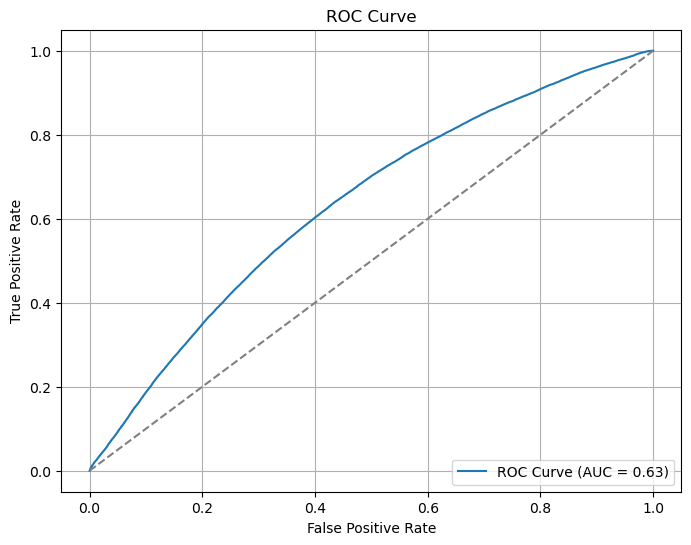

/var/folders/4x/91ch2jzn4253nhf4brp_8yxm0000gn/T/ipykernel_30136/4276735300.py:22: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

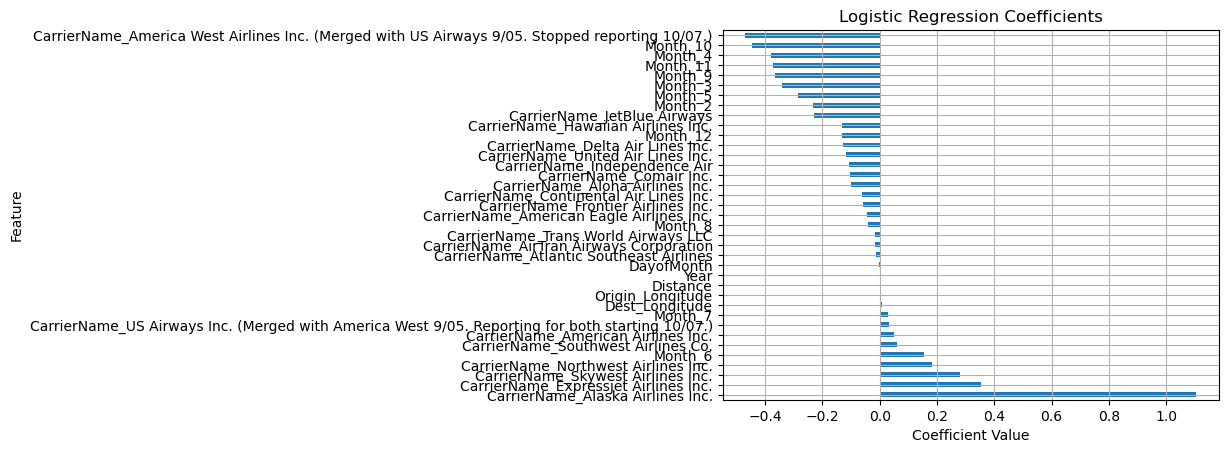

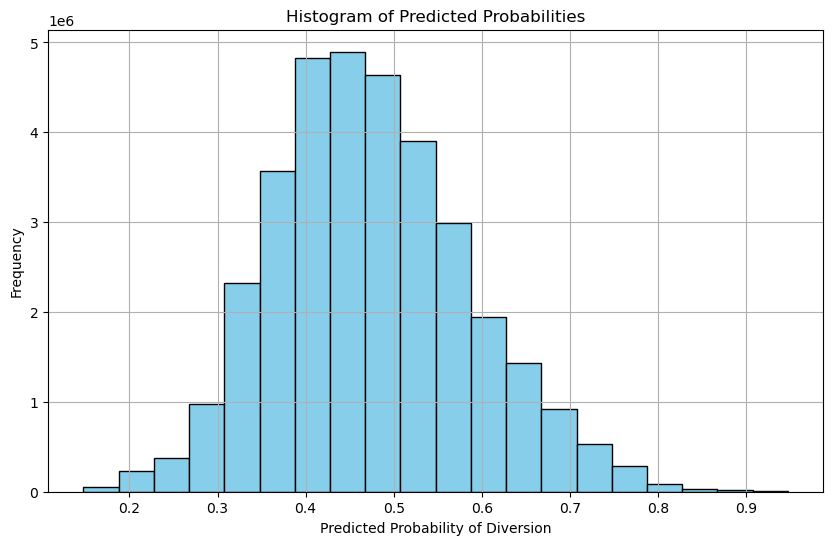

In [149]:
# ROC Curve and AUC Score
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# Bar Plot for Coefficients
plt.figure(figsize=(10, 6))
coef_df.plot(kind='barh', x='Feature', y='Coefficient', legend=False)
plt.title("Logistic Regression Coefficients")
plt.xlabel("Coefficient Value")
plt.grid(True)
plt.tight_layout()
plt.show()



# Histogram of Predicted Probabilities
plt.figure(figsize=(10, 6))
plt.hist(y_prob, bins=20, color='skyblue', edgecolor='black')
plt.title("Histogram of Predicted Probabilities")
plt.xlabel("Predicted Probability of Diversion")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()